# Notebook for analyzing KcsA inactivation state
MD trajactory: kcsa_inactivation3  100ns using PDB 5KVE, E71 protonated, protein sequence W26 to R121  
MD parameters: OLPS4, POPC lipid with endogenous ligand POPG, 11 K+ (8 add in add ions ,3 with structture), 100 ns (sampling 100 ps, 1000 frames)   
Step 1. calculate torsion angle  
EX: python ../scripts/script_module/run_dihedral.py /Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/kcsa_inactivation_3-out.cms  289:384  D  kcsa_inactivated_D_torsion.csv  

In [1]:
#step2. processing torsion angle
import sys
import os
sys.path.append(os.path.expanduser("~/Dropbox/KcsA/scripts"))
from script_module import *

from torsion_analysis_module import TorsionAnalyzer2


    

/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/data/filenames.py:110: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename


In [2]:
KcsA_analyzer = []

res_adjust_dict={'A':25, 'B':-71 , 'C':-167, 'D':-263}
# load data
for chain in ['A', 'B', 'C', 'D']:
    data_path = f'/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/kcsa_inactivated_{chain}_torsion.csv'
    if os.path.exists(data_path):
        print(f"File {data_path} exists.")
        # Load the data
        KcsA_analyzer.append(TorsionAnalyzer2(data_path, adjusted_residue_index=True, res_adjust_dic=res_adjust_dict))
    else:
        print(f"File {data_path} does not exist.")

File /Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/kcsa_inactivated_A_torsion.csv exists.
File /Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/kcsa_inactivated_B_torsion.csv exists.
File /Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/kcsa_inactivated_C_torsion.csv exists.
File /Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/kcsa_inactivated_D_torsion.csv exists.


In [3]:
intra_correlation = KcsA_analyzer[1].calculate_intra_residue_correlation()
print("Intra-residue Correlations (φ(i) vs ψ(i)):")
for residue, correlation in intra_correlation.items():
    print(f"Residue {residue}: {correlation:.3f}")

Intra-residue Correlations (φ(i) vs ψ(i)):
Residue B:26: nan
Residue B:27: -0.945
Residue B:28: -0.295
Residue B:29: -0.556
Residue B:30: -0.565
Residue B:31: -0.474
Residue B:32: -0.481
Residue B:33: -0.420
Residue B:34: -0.508
Residue B:35: -0.481
Residue B:36: -0.456
Residue B:37: -0.469
Residue B:38: -0.461
Residue B:39: -0.472
Residue B:40: -0.387
Residue B:41: -0.423
Residue B:42: -0.453
Residue B:43: -0.544
Residue B:44: -0.406
Residue B:45: -0.288
Residue B:46: -0.433
Residue B:47: -0.343
Residue B:48: -0.451
Residue B:49: -0.422
Residue B:50: -0.393
Residue B:51: -0.496
Residue B:52: -0.072
Residue B:53: -0.189
Residue B:54: 0.309
Residue B:55: -0.118
Residue B:56: -0.221
Residue B:57: -0.180
Residue B:58: -0.476
Residue B:59: -0.250
Residue B:60: -0.318
Residue B:61: 0.190
Residue B:62: -0.505
Residue B:63: -0.500
Residue B:64: -0.423
Residue B:65: -0.438
Residue B:66: -0.465
Residue B:67: -0.481
Residue B:68: -0.426
Residue B:69: -0.486
Residue B:70: -0.375
Residue B:71: -0.

In [4]:
KcsA_analyzer[1].data

frame_index     time_ps   B:26-psi  B:26-phi    B:27-psi    B:27-phi  \
0               0       0.000  -3.313178       NaN   11.817654 -117.476353   
1               1     100.002 -11.145064       NaN  -17.349062  -81.393363   
2               2     200.004  -3.195477       NaN  -61.864806  -52.738535   
3               3     300.006 -50.706103       NaN  -43.885874  -39.967183   
4               4     400.008   9.628128       NaN  -57.326616  -59.025279   
...           ...         ...        ...       ...         ...         ...   
996           996   99601.992  53.535683       NaN -117.653164   72.281290   
997           997   99701.994  32.540405       NaN -136.886220   45.819308   
998           998   99801.996  41.366670       NaN -153.077809   64.374598   
999           999   99901.998   3.914766       NaN -138.185736   65.721161   
1000         1000  100000.008  36.256356       NaN -148.058877   69.418441   

       B:28-psi   B:28-phi   B:29-psi   B:29-phi  ...  B:117-psi   B:117-phi  \
0    -43.489328 -58.798715 -41.027608 -51.139637  ...  -7.890931  -96.367317   
1    -36.172384 -75.360355 -32.289808 -61.448717  ... -26.502285  -71.699934   
2    -32.121971 -73.264061 -46.528430 -63.583972  ... -30.436048  -66.275419   
3    -46.659493 -62.615698 -48.612326 -71.465486  ... -13.981721  -86.659496   
4    -52.626816 -62.913058 -30.653244 -59.371403  ...  -3.246534 -110.149715   
...         ...        ...        ...        ...  ...        ...         ...   
996  -36.398038 -82.825636 -52.716137 -45.870740  ... -34.089893  -45.678956   
997  -31.201680 -62.513025 -15.266223 -80.237842  ... -29.481182  -44.818014   
998  -30.485009 -52.127561 -33.373396 -73.316885  ... -34.287688  -64.143680   
999  -44.997525 -46.526509 -29.715260 -65.844128  ... -35.243189  -60.929523   
1000 -26.462441 -64.900306 -42.924032 -65.811554  ... -40.356539  -57.869219   

      B:118-psi  B:118-phi  B:119-psi  B:119-phi  B:120-psi   B:120-phi  \
0    -34.942804 -65.628505 -17.479640 -62.071658 -18.503377  -69.449759   
1    -26.391574 -53.429081 -15.147688 -86.343515 -50.354589  -90.252726   
2    -22.237945 -57.561609 -13.113895 -81.346494 -31.339540  -91.991077   
3    -48.932656 -66.117321 -26.768203 -51.499701 -20.563656  -76.314303   
4    -39.084750 -59.025963 -49.746184 -48.109636  -1.295896  -60.760057   
...         ...        ...        ...        ...        ...         ...   
996  -47.804863 -60.271626 -45.070256 -67.566390 -52.878520  -55.810345   
997  -21.394022 -74.435174 -44.606479 -87.089649 -28.201803  -71.540171   
998  -30.174850 -61.613090 -12.415999 -88.239372 -31.727784 -112.522548   
999  -28.266462 -65.033606 -13.431099 -74.542444 -34.982262 -111.335623   
1000 -44.247469 -53.986275 -33.572600 -65.180683 -24.173264  -97.830390   

      B:121-psi   B:121-phi  
0           NaN -132.399153  
1           NaN  -68.099891  
2           NaN  -82.400771  
3           NaN  -70.274928  
4           NaN -151.885811  
...         ...         ...  
996         NaN  -72.923300  
997         NaN  -64.248516  
998         NaN  -82.440103  
999         NaN  -83.135297  
1000        NaN  -93.860215  

[1001 rows x 194 columns]

In [5]:
#calculate inter-residue correlation
inter_correlation = KcsA_analyzer[0].calculate_inter_residue_correlation()
print("Inter-residue Correlations (φ(i+1) vs ψ(i)):")
for residue, correlation in inter_correlation.items():
    print(f"Residue {residue}: {correlation:.3f}")

Inter-residue Correlations (φ(i+1) vs ψ(i)):
Residue A:26: -0.248
Residue A:27: 0.098
Residue A:28: -0.003
Residue A:29: -0.728
Residue A:30: 0.309
Residue A:31: -0.029
Residue A:32: -0.206
Residue A:33: -0.350
Residue A:34: -0.471
Residue A:35: -0.414
Residue A:36: -0.549
Residue A:37: -0.487
Residue A:38: -0.394
Residue A:39: -0.508
Residue A:40: -0.578
Residue A:41: -0.433
Residue A:42: -0.475
Residue A:43: -0.540
Residue A:44: -0.527
Residue A:45: -0.470
Residue A:46: -0.509
Residue A:47: -0.502
Residue A:48: -0.615
Residue A:49: -0.670
Residue A:50: -0.506
Residue A:51: -0.521
Residue A:52: 0.656
Residue A:53: -0.537
Residue A:54: -0.284
Residue A:55: 0.809
Residue A:56: -0.392
Residue A:57: -0.593
Residue A:58: -0.513
Residue A:59: -0.679
Residue A:60: -0.616
Residue A:61: -0.562
Residue A:62: -0.387
Residue A:63: -0.572
Residue A:64: -0.496
Residue A:65: -0.556
Residue A:66: -0.548
Residue A:67: -0.565
Residue A:68: -0.541
Residue A:69: -0.622
Residue A:70: -0.575
Residue A:71: 

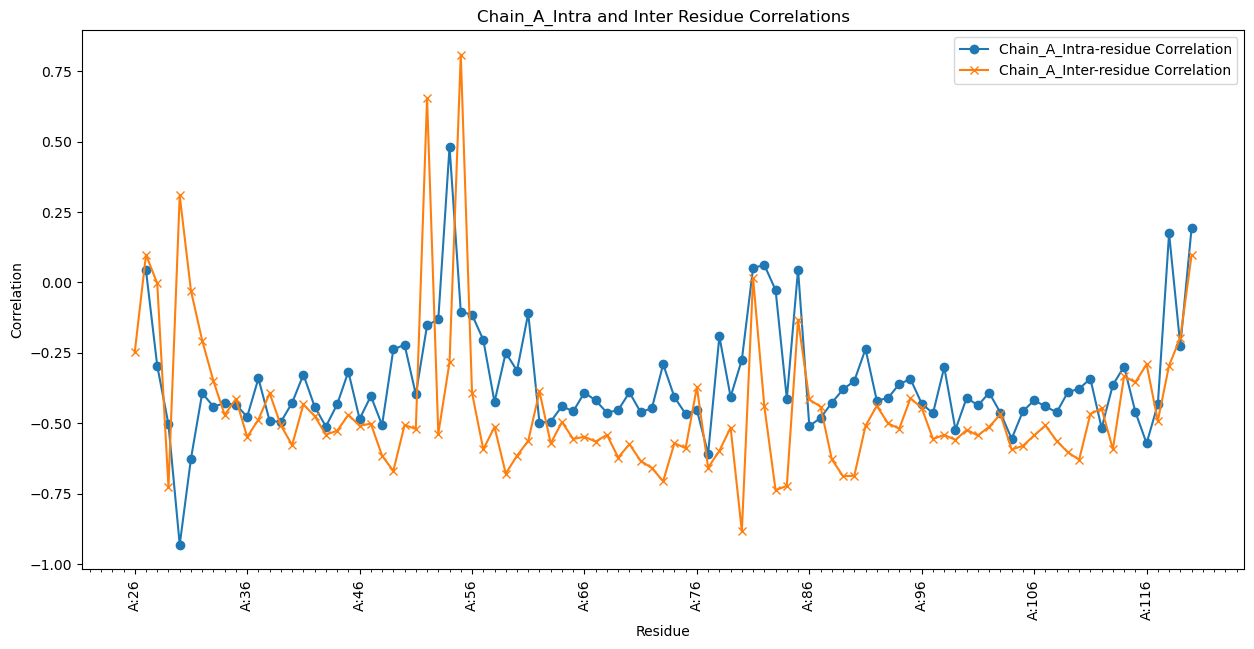

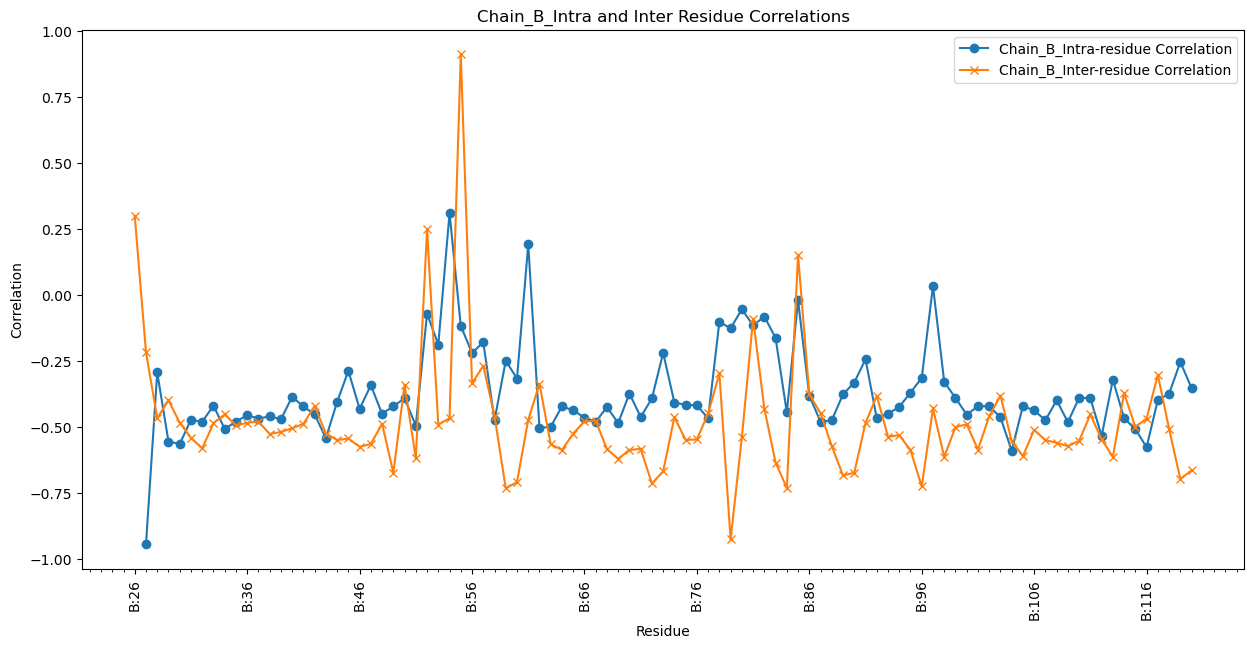

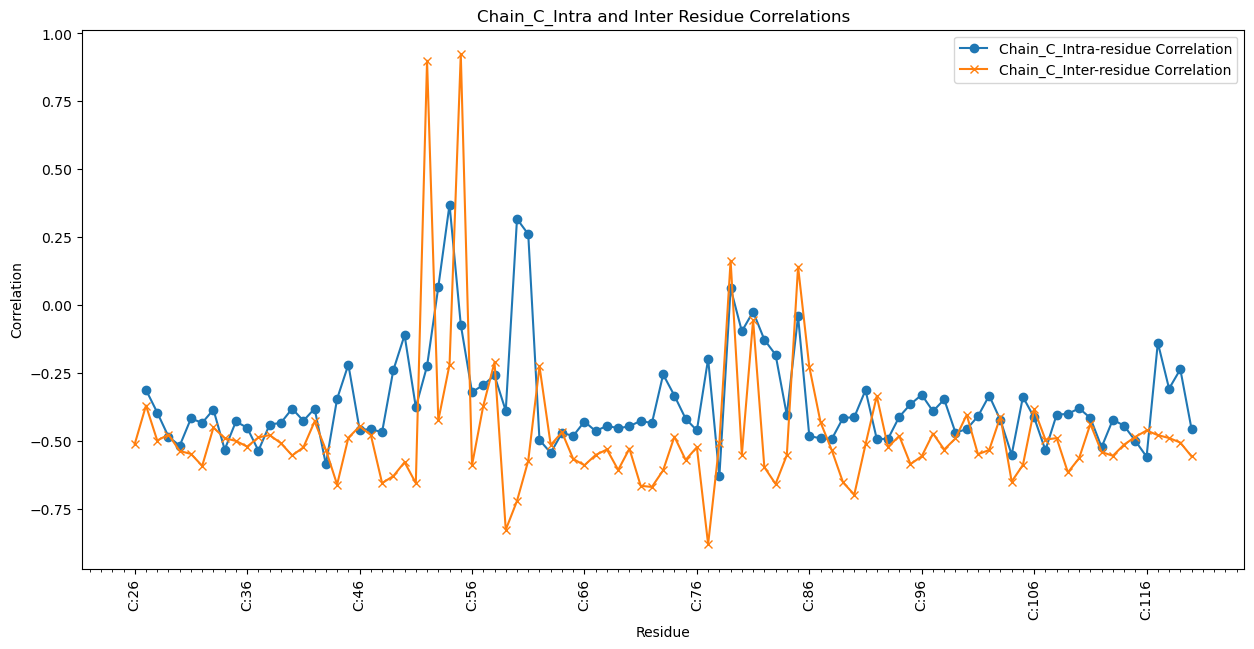

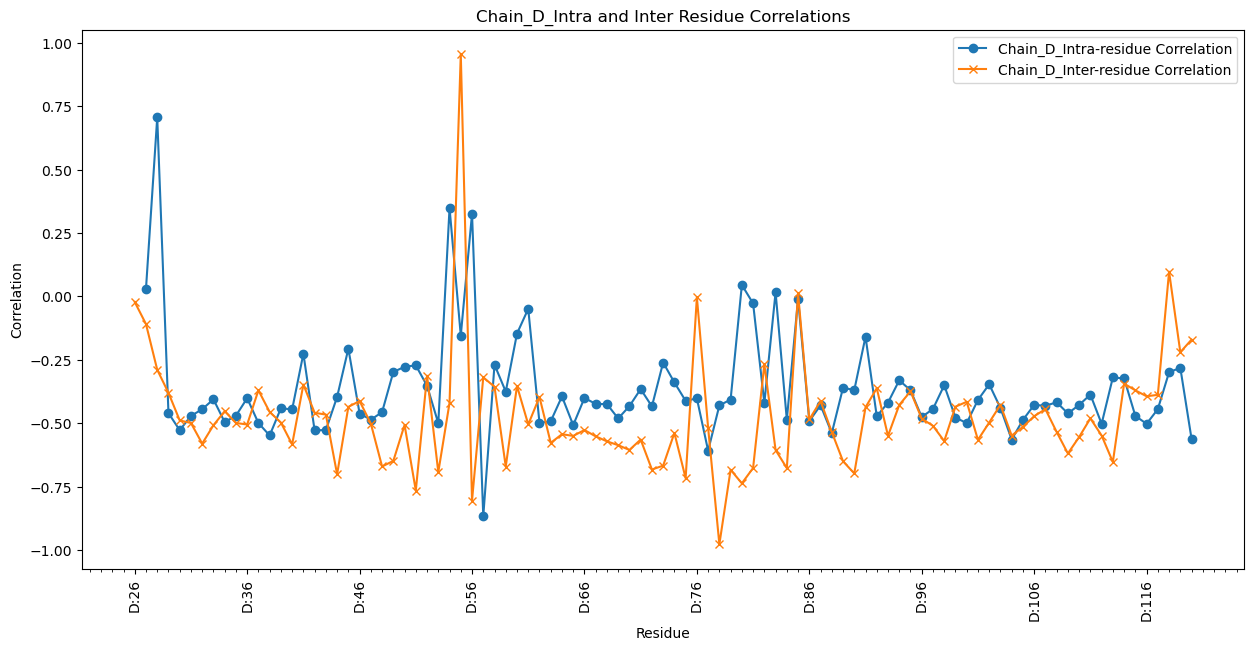

In [6]:
#plot the correlation
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
for chain, i in zip(['A', 'B', 'C', 'D'], range(4)):

    inter_correlation = KcsA_analyzer[i].calculate_inter_residue_correlation()
    intra_correlation = KcsA_analyzer[i].calculate_intra_residue_correlation()
    # Extract residues and their corresponding correlations
    residues = list(intra_correlation.keys())
    intra_values = list(intra_correlation.values())
    inter_values = list(inter_correlation.values())

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15, 7))

    # Plot intra-residue correlations
    ax.plot(residues, intra_values, label=f'Chain_{chain}_Intra-residue Correlation', marker='o')

    # Plot inter-residue correlations
    ax.plot(residues[:-1], inter_values, label=f'Chain_{chain}_Inter-residue Correlation', marker='x')


    # Set labels and title
    ax.set_xlabel('Residue')
    ax.set_ylabel('Correlation')
    ax.set_title(f'Chain_{chain}_Intra and Inter Residue Correlations')
    ax.legend()

    # Set up major and minor tickers
    major_locator = MultipleLocator(10)  # Adjust to the desired spacing of major ticks
    minor_locator = MultipleLocator(1)   # Adjust to the desired spacing of minor ticks

    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)

    # Rotate x-axis labels for better readability and only show for major ticks
    ax.tick_params(axis='x', which='major', labelrotation=90)
    ax.tick_params(axis='x', which='minor', labelbottom=False)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    plt.savefig(f'intra_inter_residue_correlation_chain_{chain}.png', dpi=300, bbox_inches='tight')
    plt.show()

/Users/yunyao_1/miniforge3/envs/KcsA_torsion/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


Combined plot saved as KcsA_Rama_plots_chainA/Combined_Ramachandran_1k4c.png


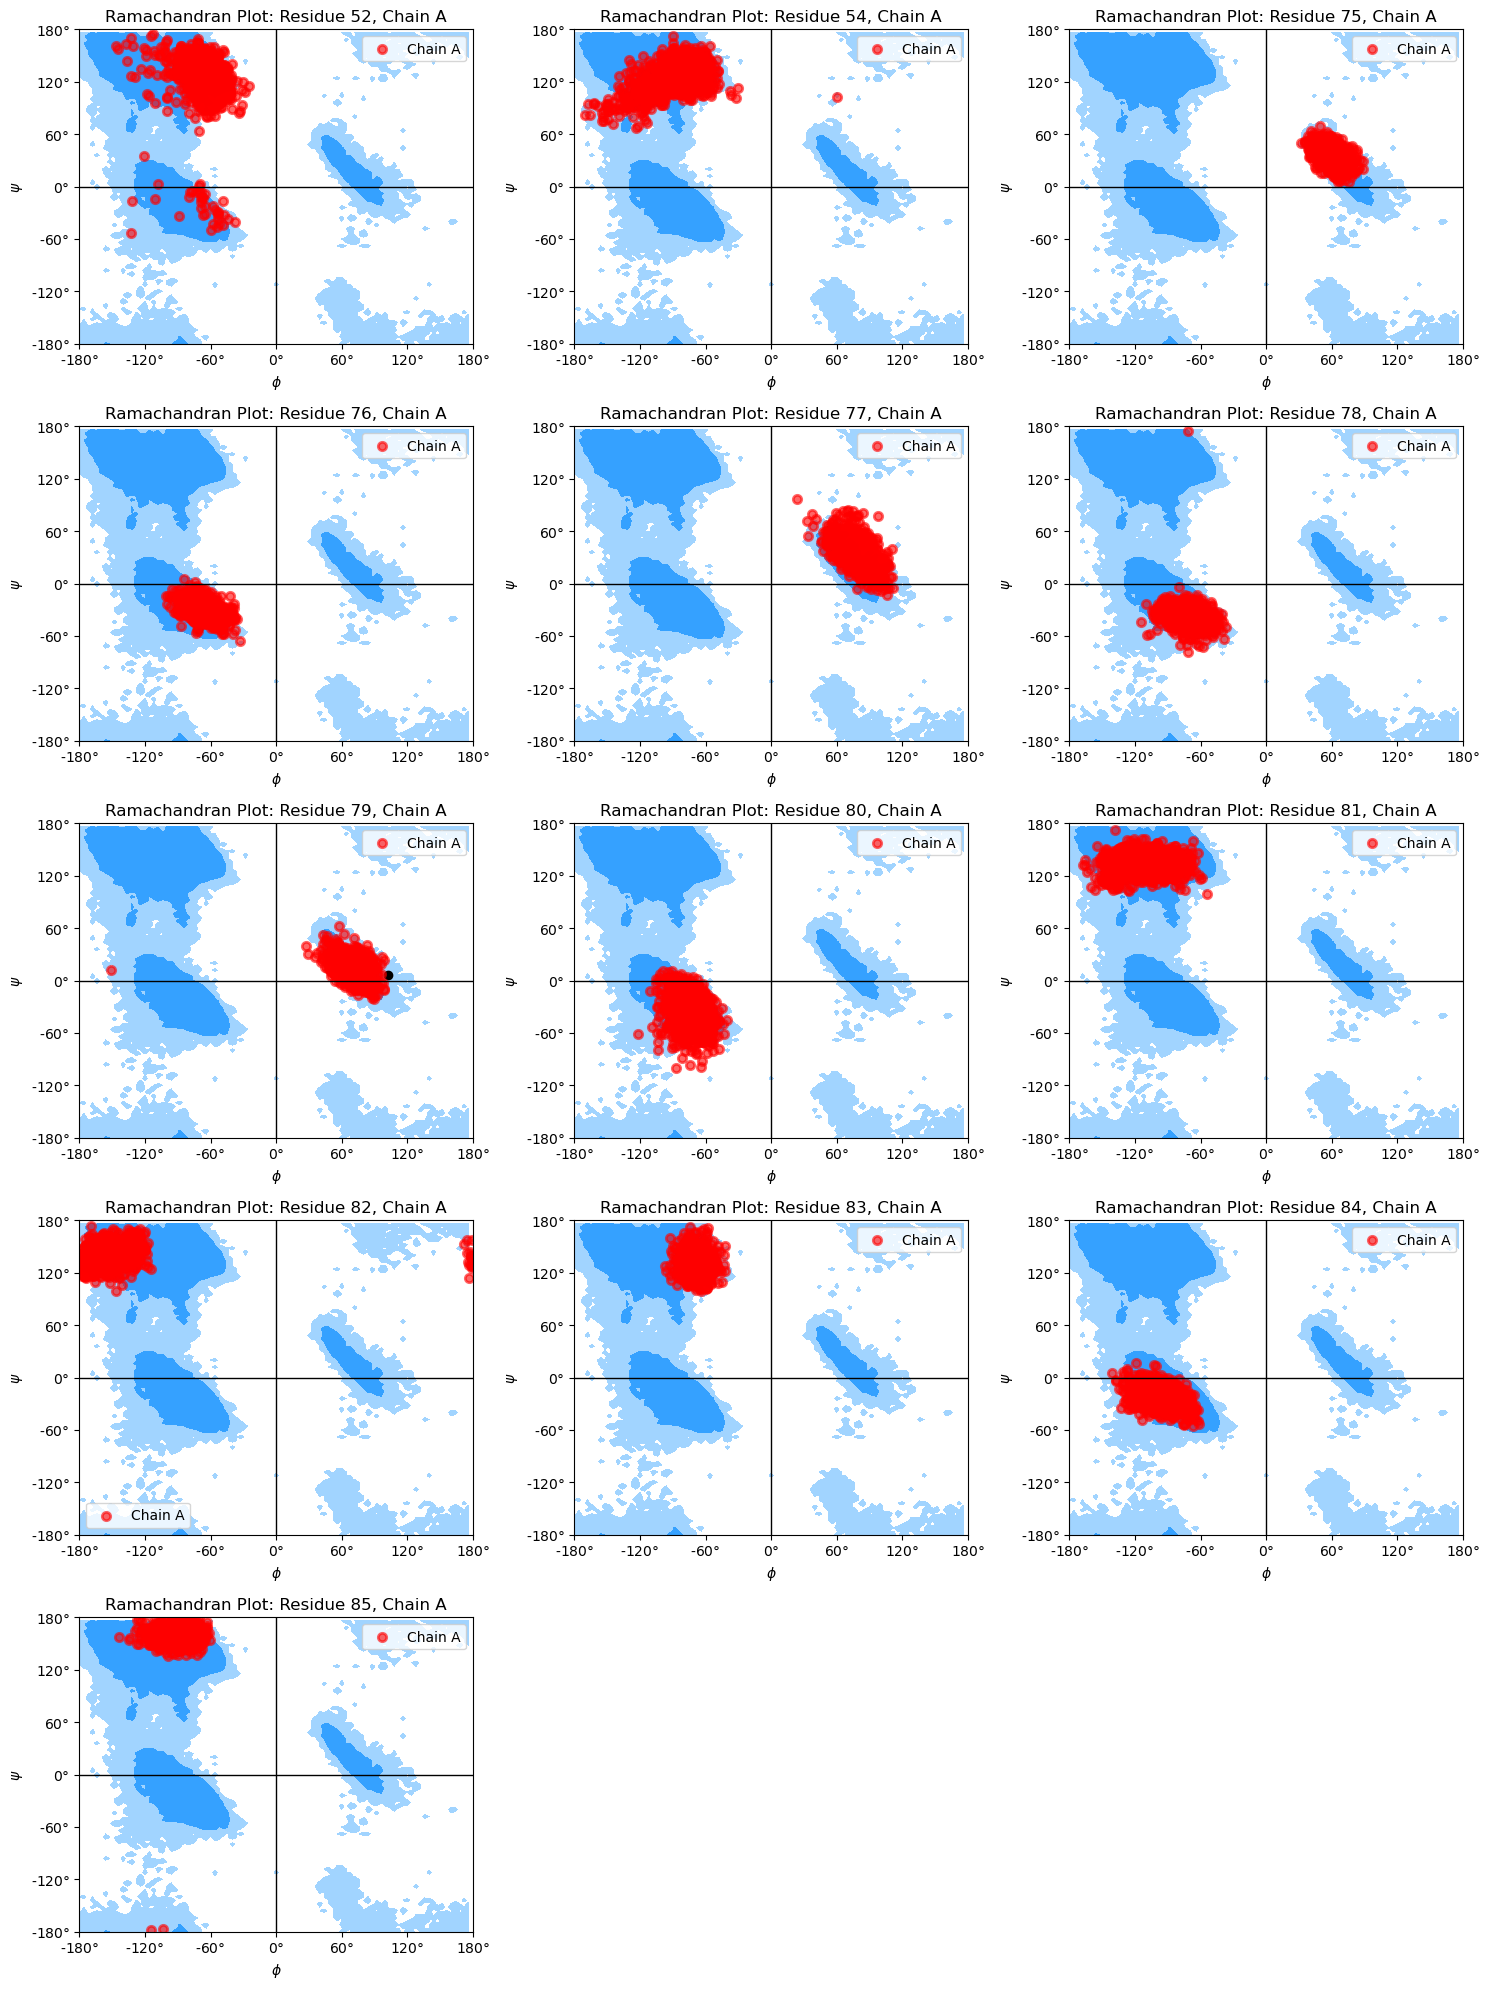

Combined plot saved as KcsA_Rama_plots_chainB/Combined_Ramachandran_1k4c.png


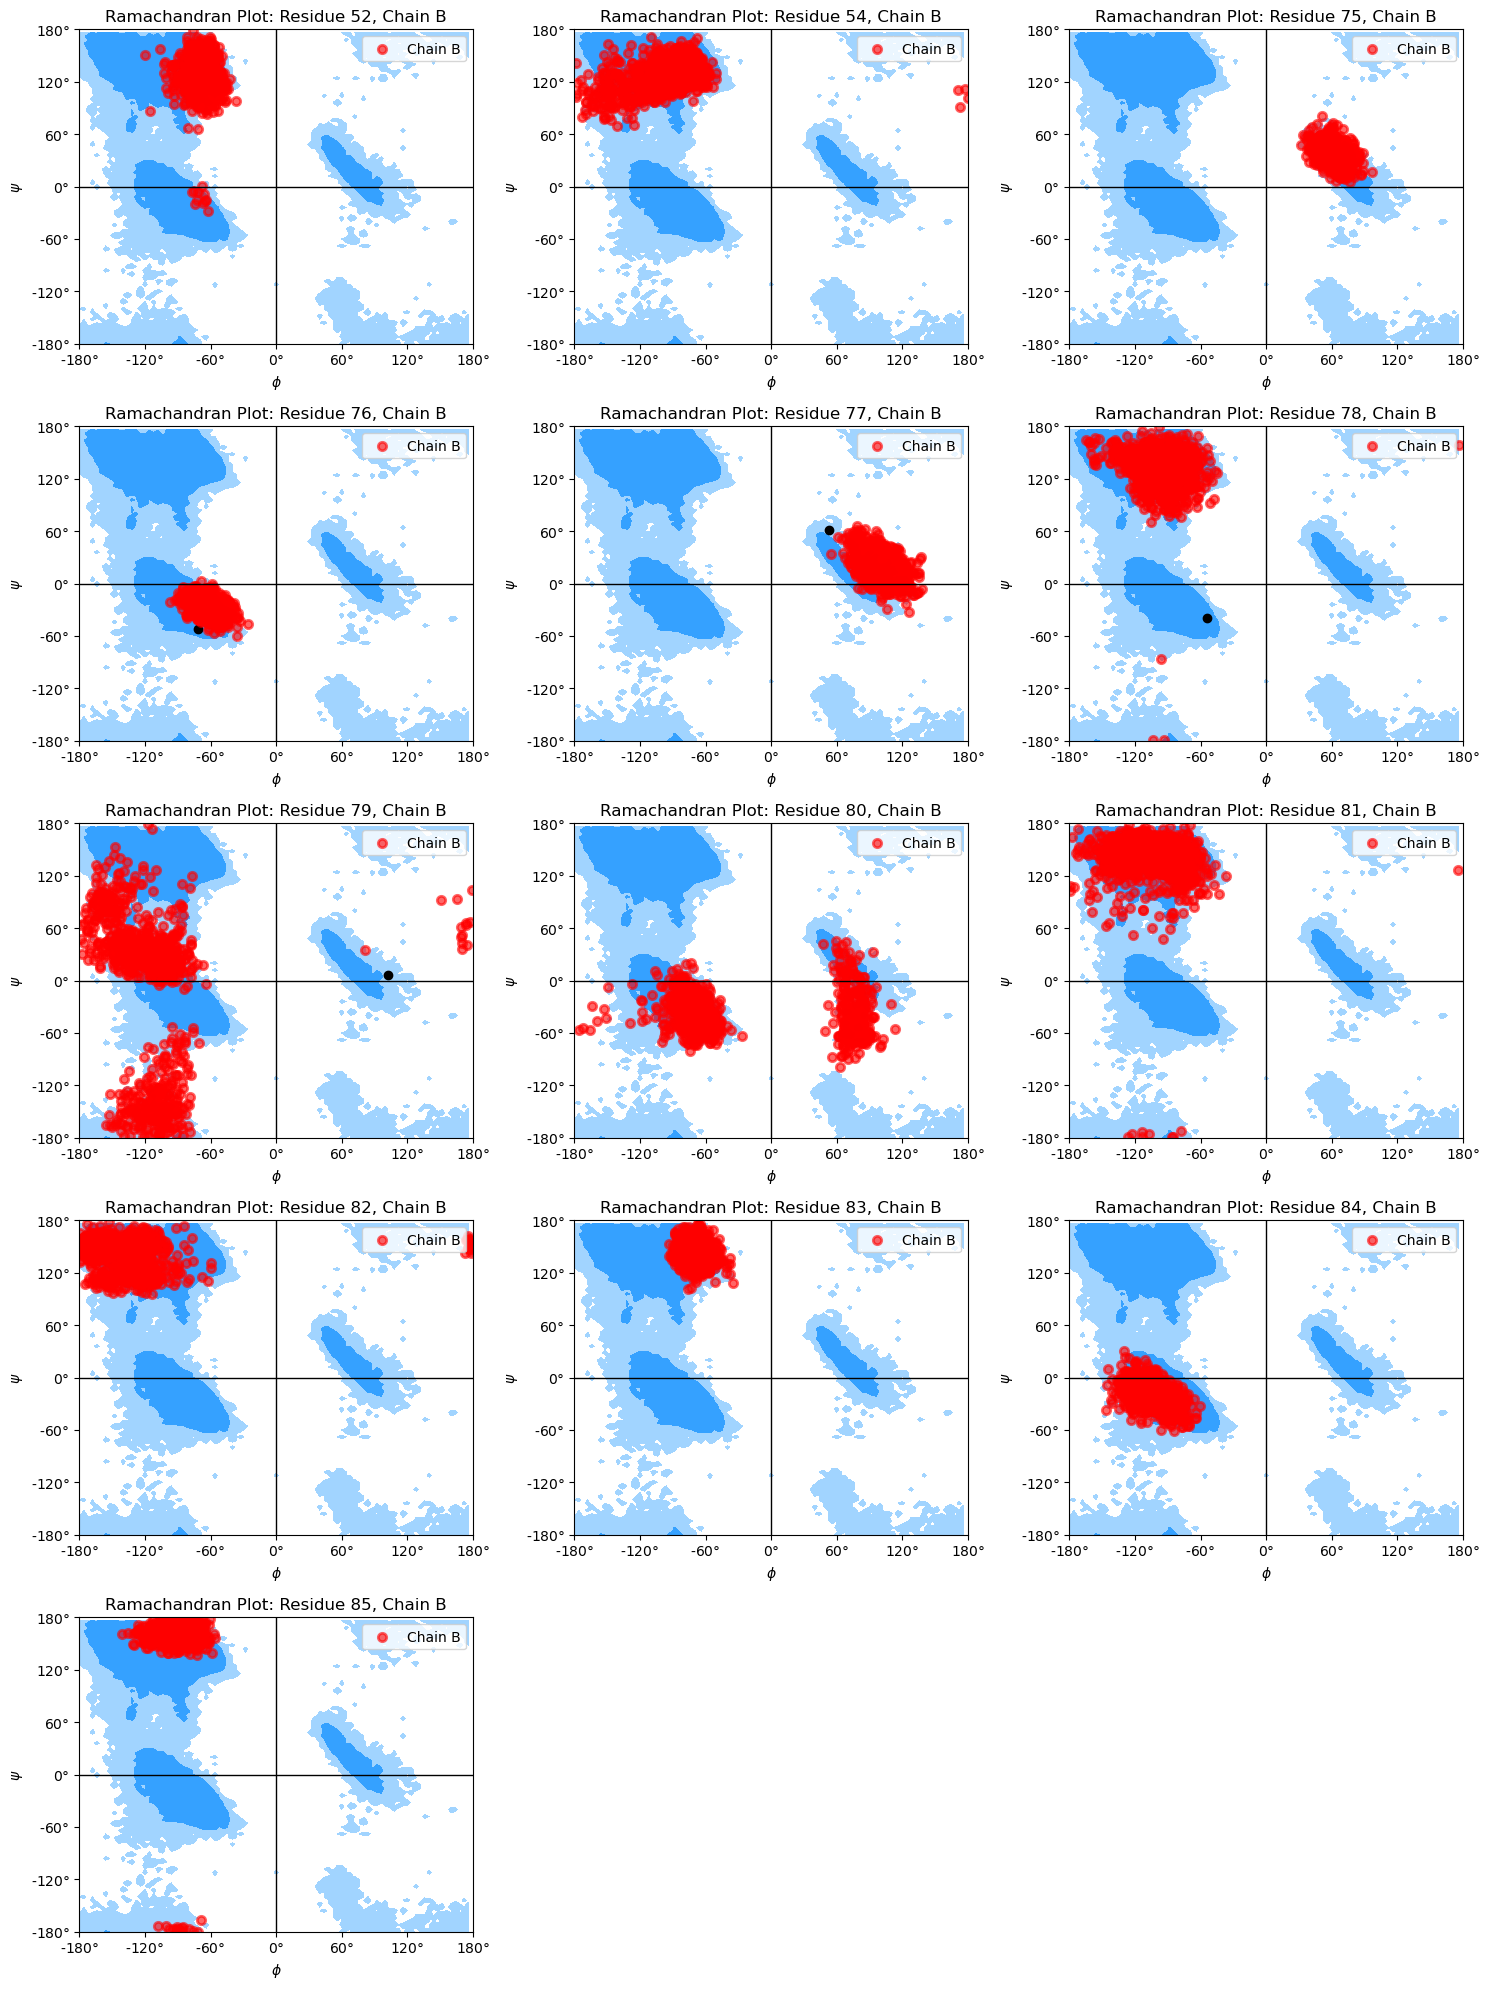

Combined plot saved as KcsA_Rama_plots_chainC/Combined_Ramachandran_1k4c.png


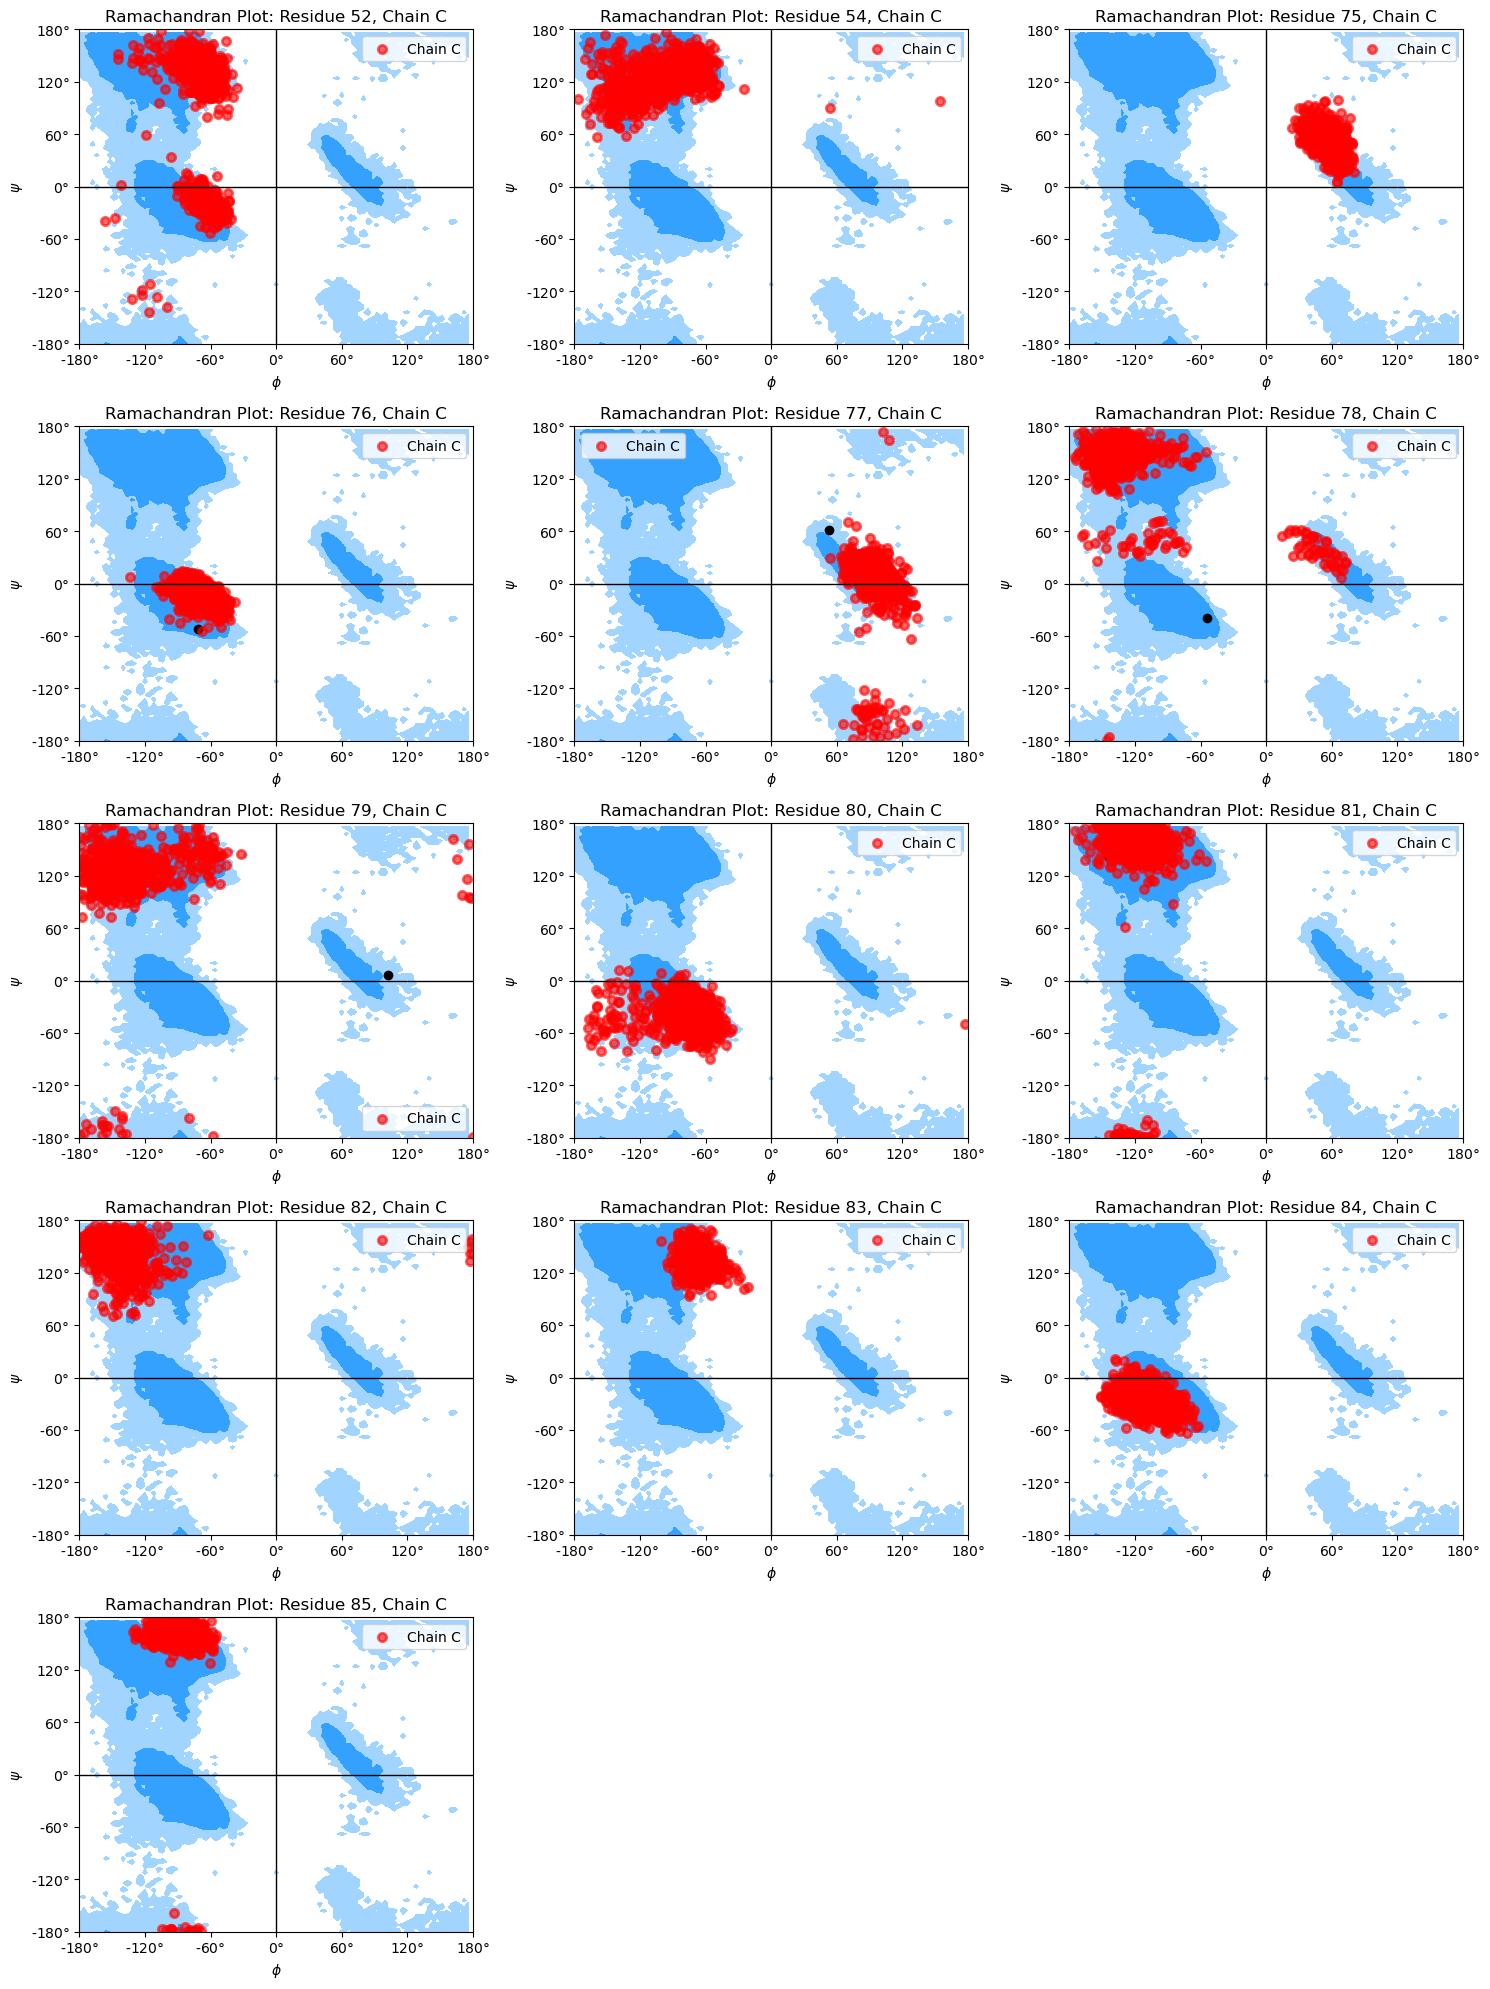

Combined plot saved as KcsA_Rama_plots_chainD/Combined_Ramachandran_1k4c.png


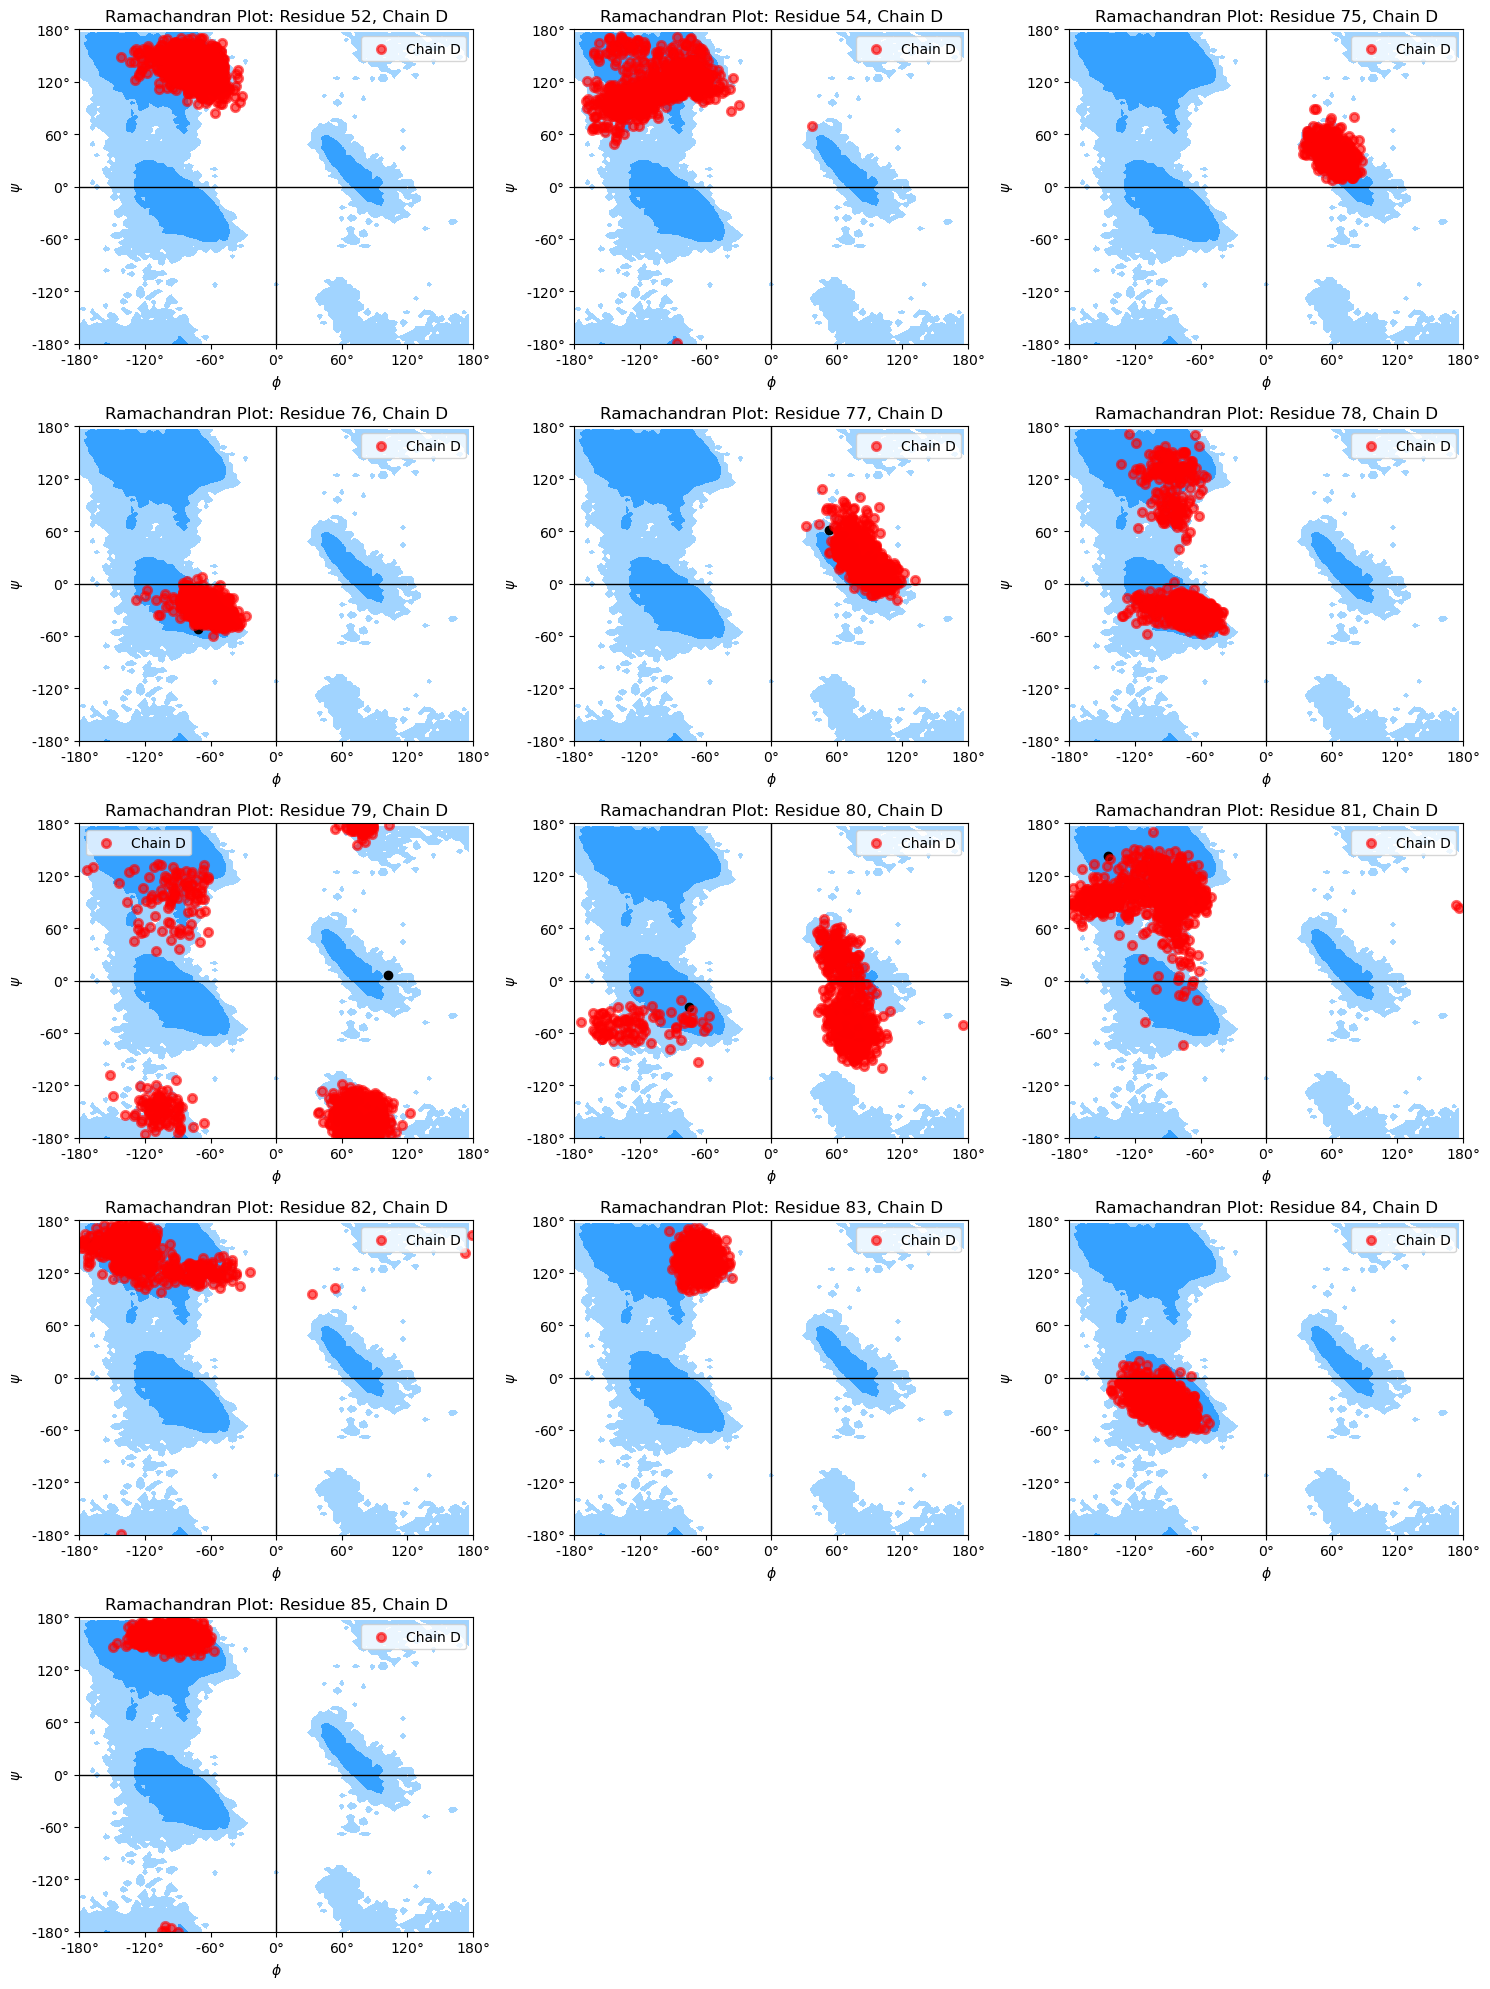

In [7]:
# plot residue torsion angles over Ramachandran plot
residues_to_plot=[52, 54, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
#chains=['A']
#DHFR_analyzer.plot_ramachandran(residue_index='23', PDB_code='1rx1', chain='A', output_dir='DHFR_Rama_plots2') 
for chain, i in zip(['A', 'B', 'C', 'D'], range(4)):
#for chain, i in zip(['D'], [3]):
    KcsA_analyzer[i].plot_all_ramachandran(residue_indices=residues_to_plot, PDB_code='1k4c', PDB_chain='C', chains=[chain], output_dir=f'KcsA_Rama_plots_chain{chain}')

Combined plot saved as KcsA_scatter_plots_ChainA/inter_intra_torsion_scatter_52.png


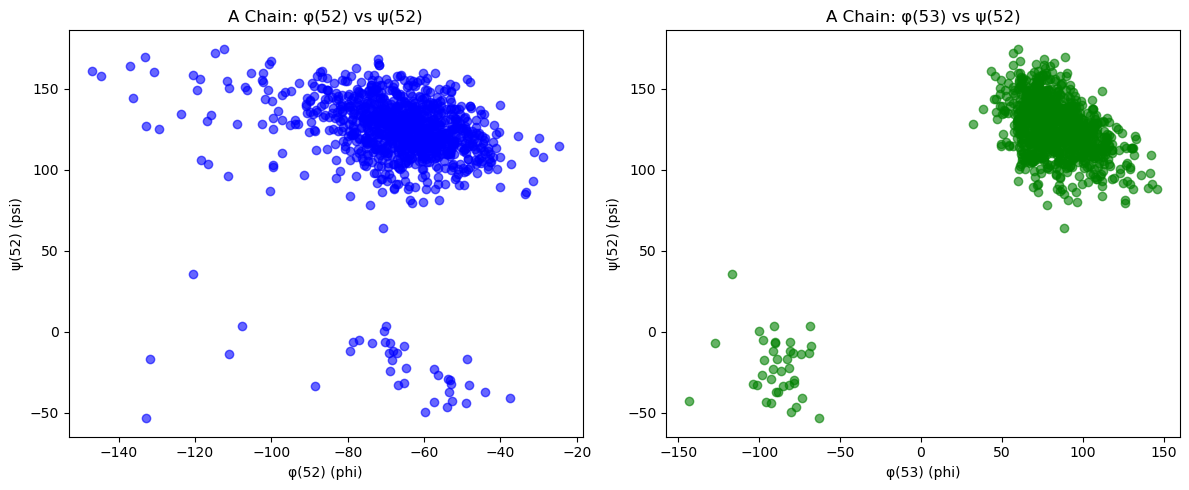

In [8]:
residues_to_plot=[52]
for residue in residues_to_plot:
    KcsA_analyzer[0].plot_scatter(residue, chains='A', output_dir='KcsA_scatter_plots_ChainA')

Combined plot saved as KcssA_scatter_plots_ChainB/inter_intra_torsion_scatter_52.png


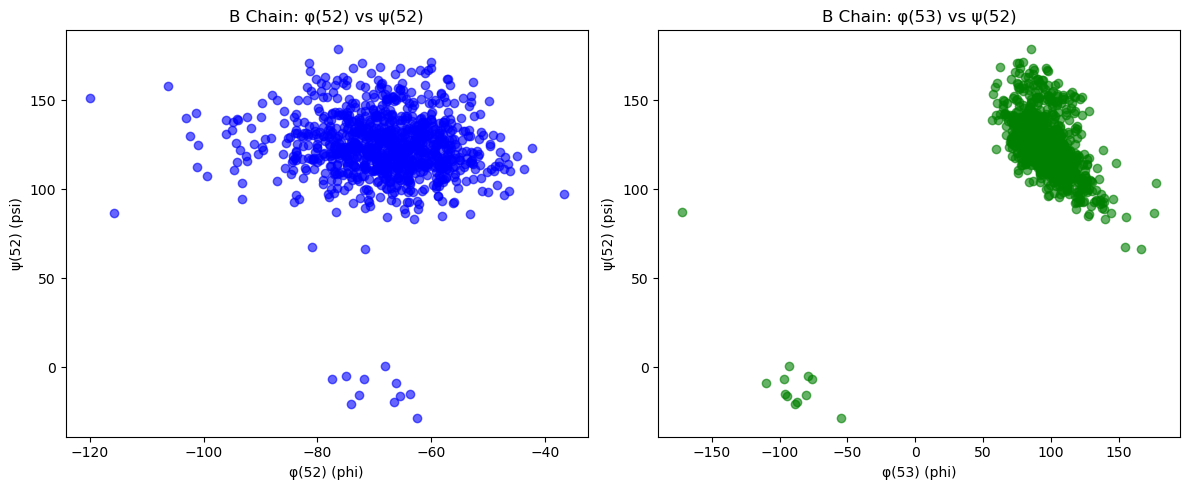

Combined plot saved as KcssA_scatter_plots_ChainB/inter_intra_torsion_scatter_79.png


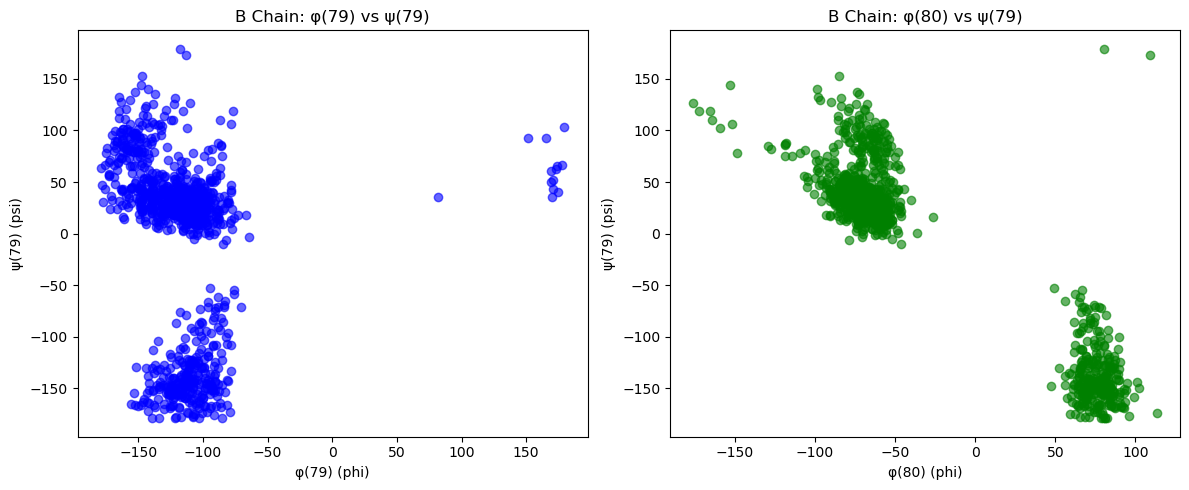

Combined plot saved as KcssA_scatter_plots_ChainB/inter_intra_torsion_scatter_80.png


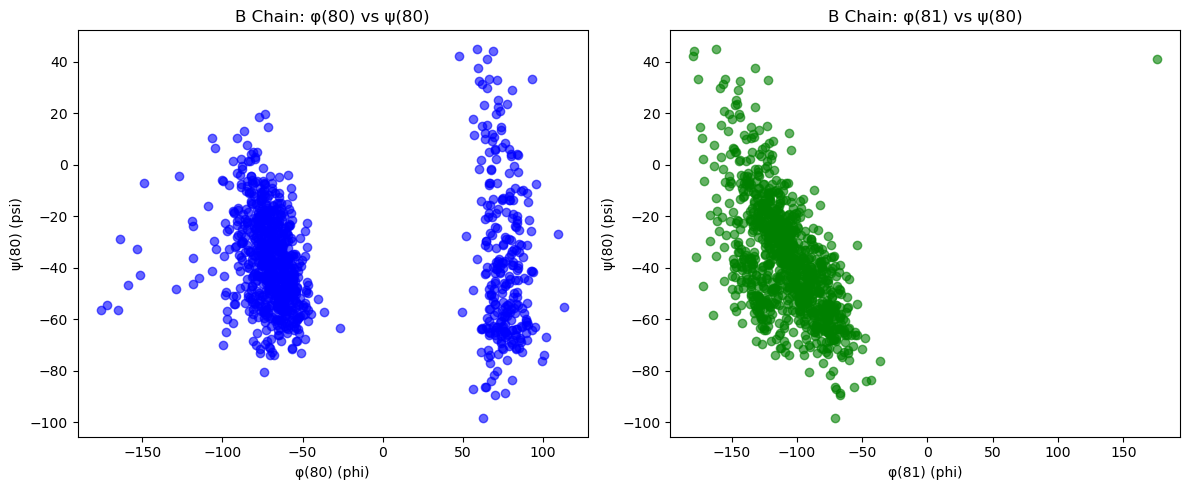

In [9]:
residues_to_plot=[52, 79, 80]
for residue in residues_to_plot:
    KcsA_analyzer[1].plot_scatter(residue, chains='B', output_dir='KcssA_scatter_plots_ChainB')

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_52.png


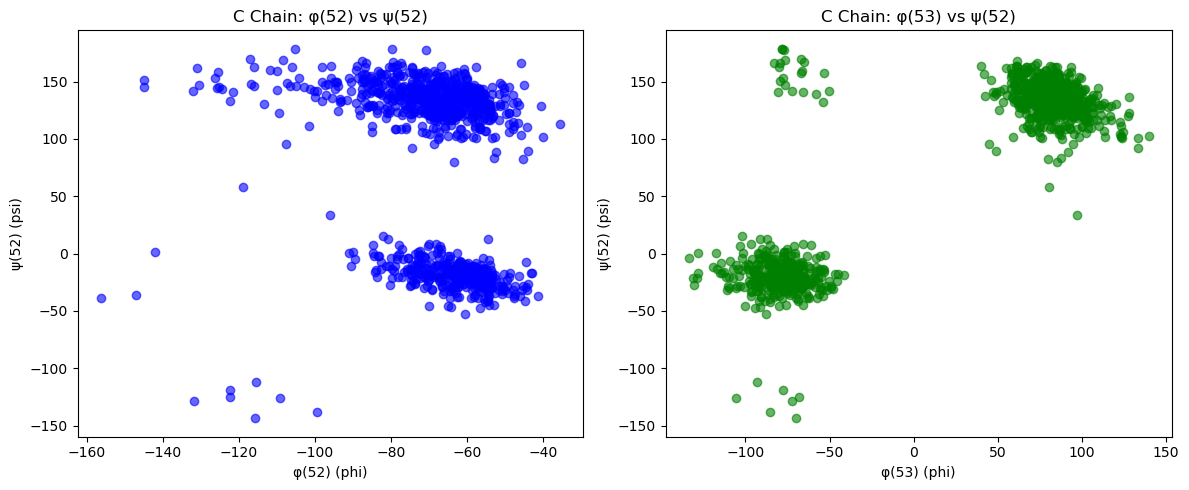

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_77.png


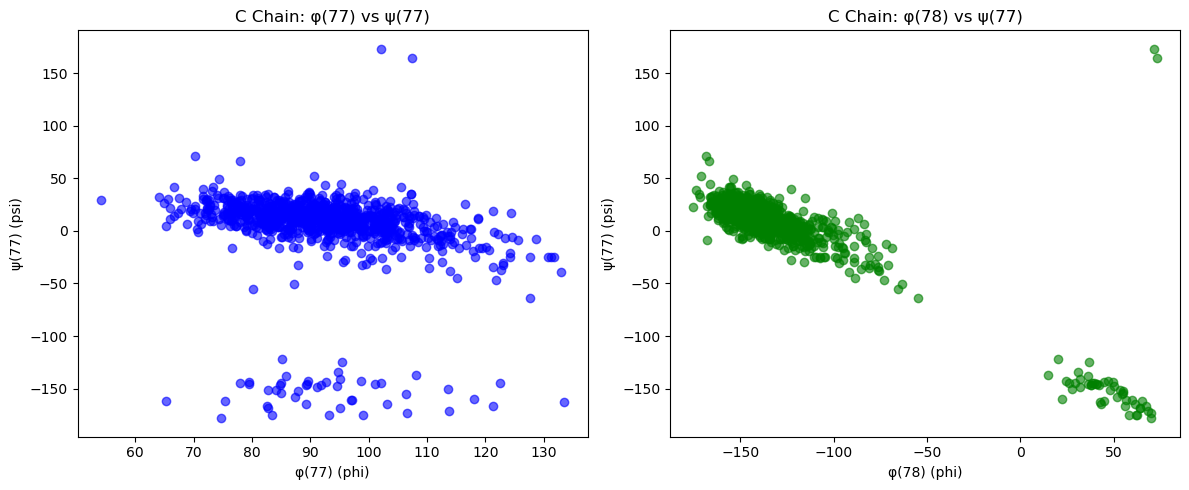

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_78.png


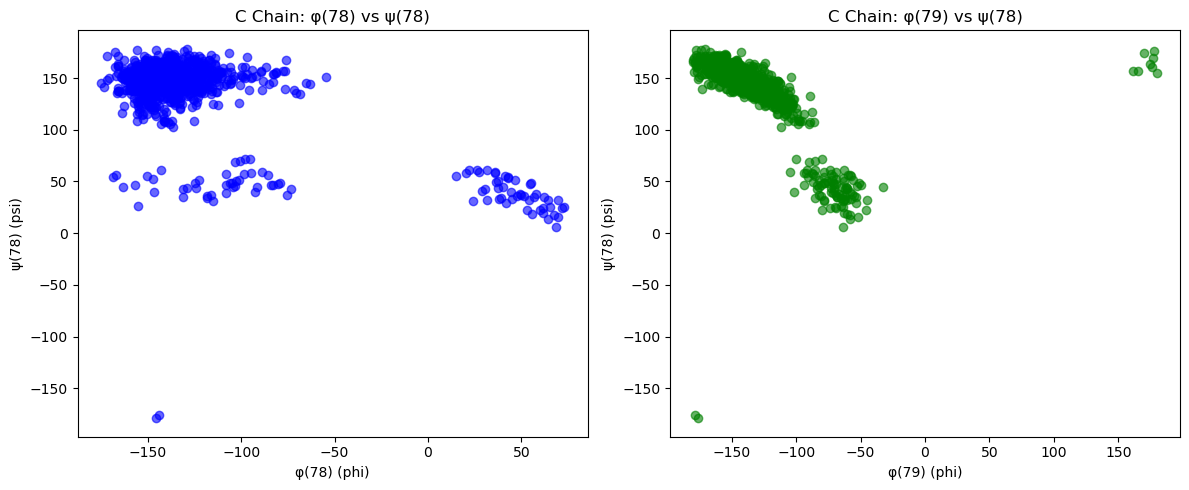

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_79.png


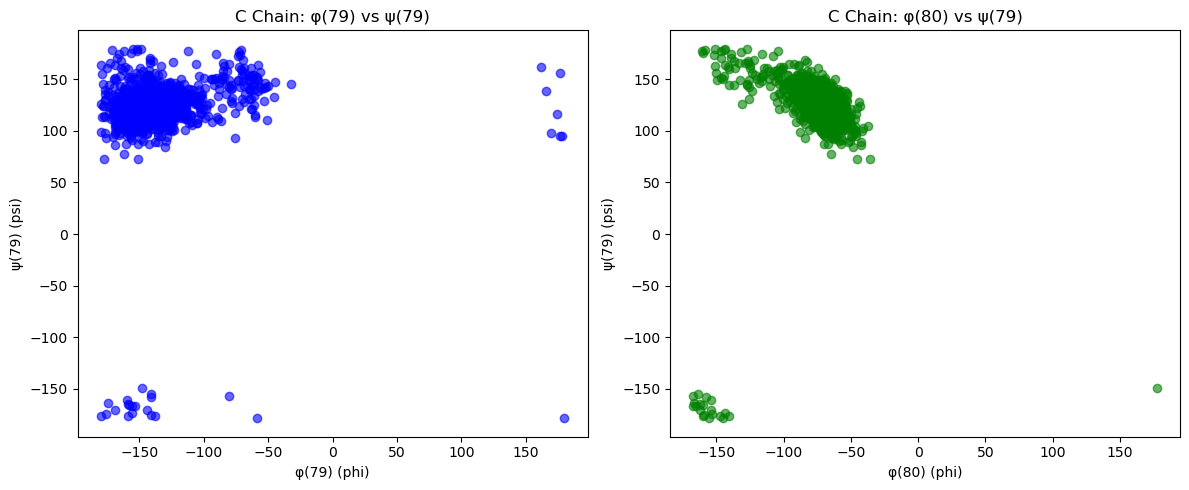

Combined plot saved as KcssA_scatter_plots_ChainC/inter_intra_torsion_scatter_80.png


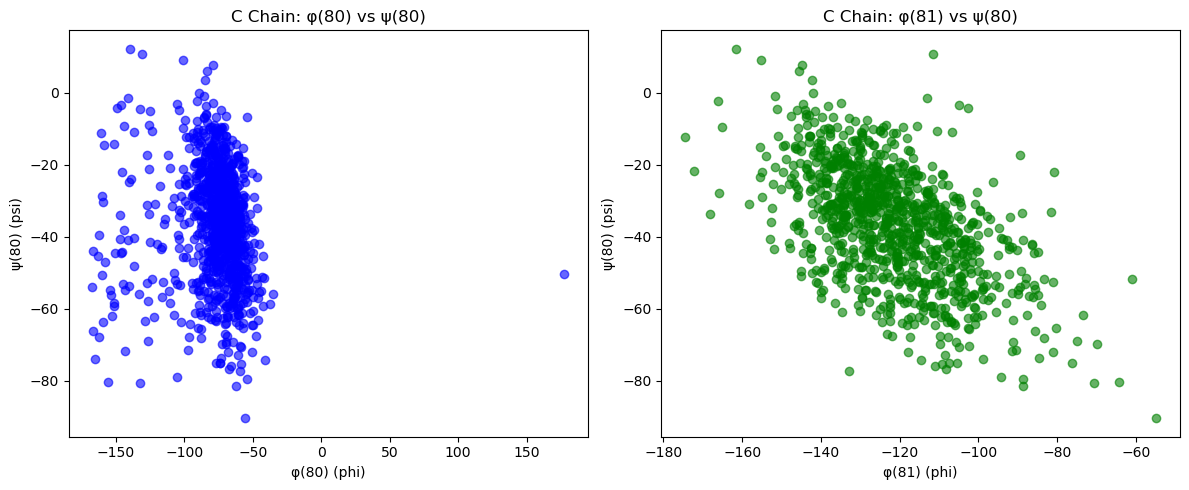

In [10]:
residues_to_plot=[52, 77, 78, 79, 80]
for residue in residues_to_plot:
    KcsA_analyzer[2].plot_scatter(residue, chains='C', output_dir='KcssA_scatter_plots_ChainC')

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_77.png


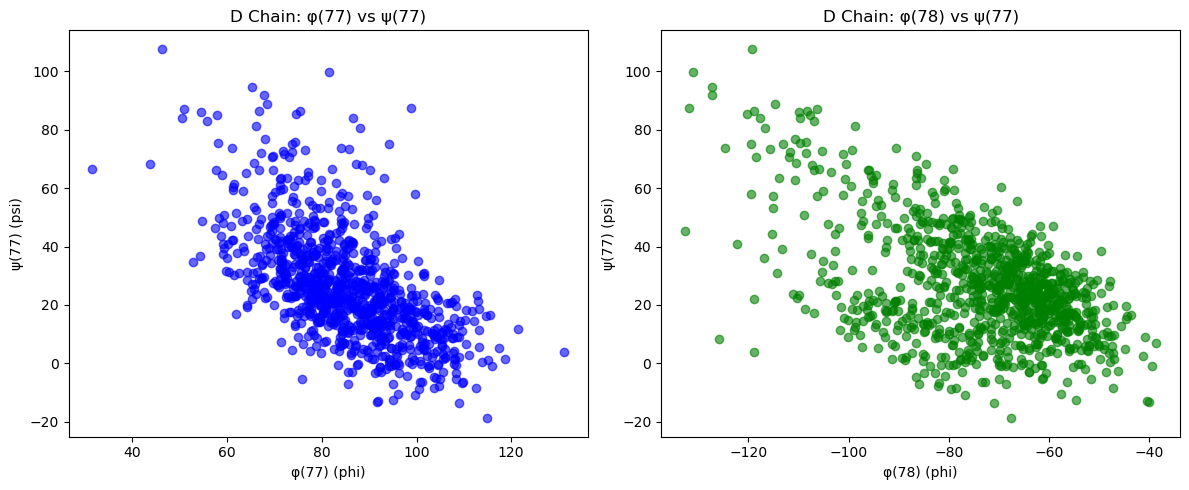

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_78.png


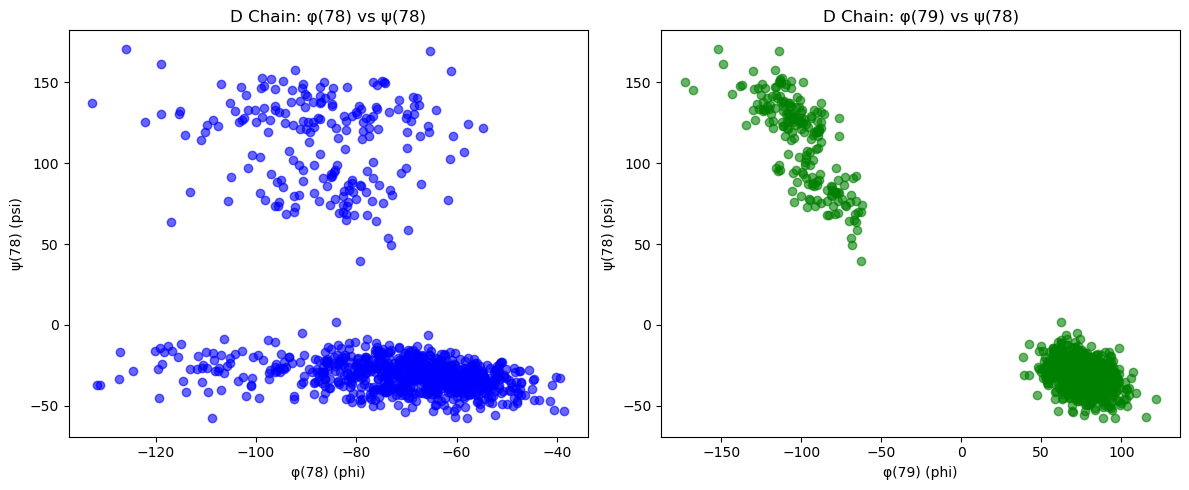

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_79.png


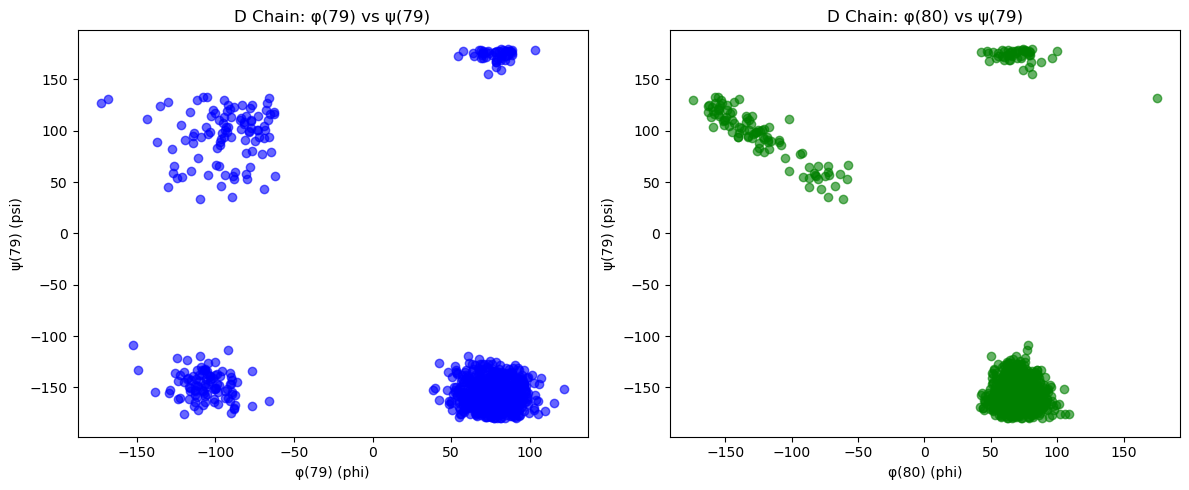

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_80.png


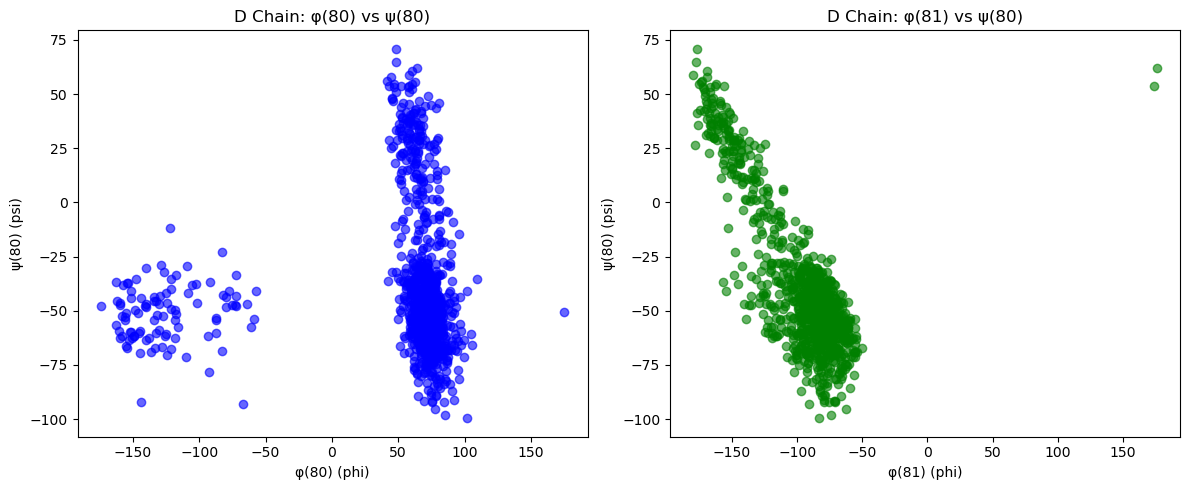

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_81.png


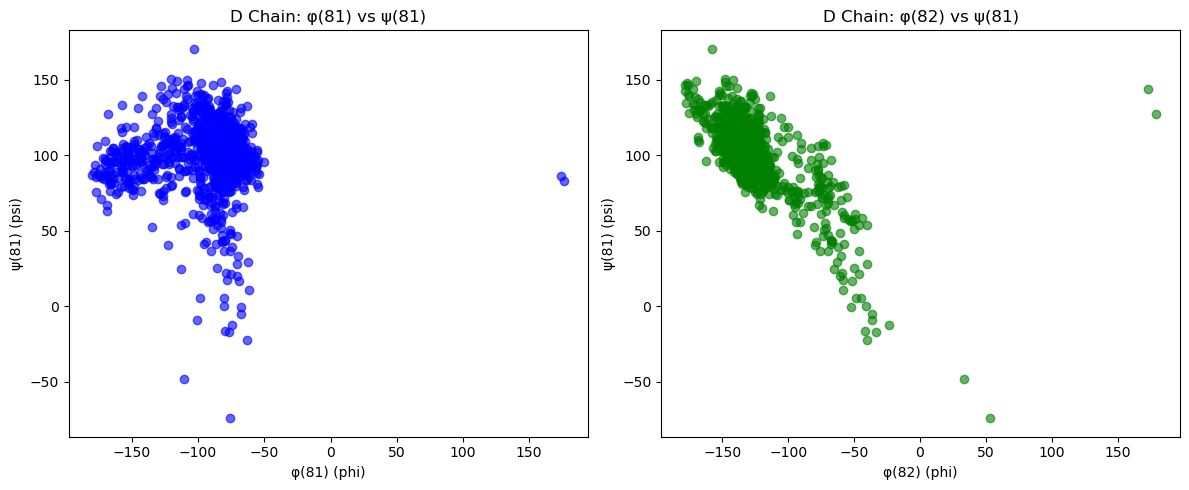

Combined plot saved as KcssA_scatter_plots_ChainD/inter_intra_torsion_scatter_82.png


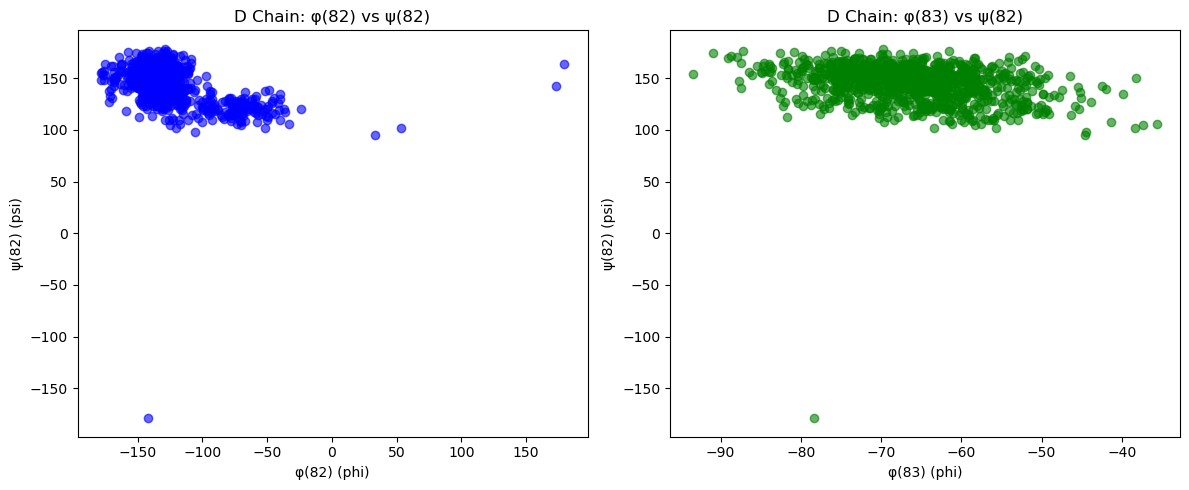

In [11]:
residues_to_plot=[77, 78, 79, 80,81, 82]
for residue in residues_to_plot:
    KcsA_analyzer[3].plot_scatter(residue, chains='D', output_dir='KcssA_scatter_plots_ChainD')

Plot saved as KcsA_torsion_vs_time_ChainA/Torsion_vs_Time_Residue_52_Chain_A.png


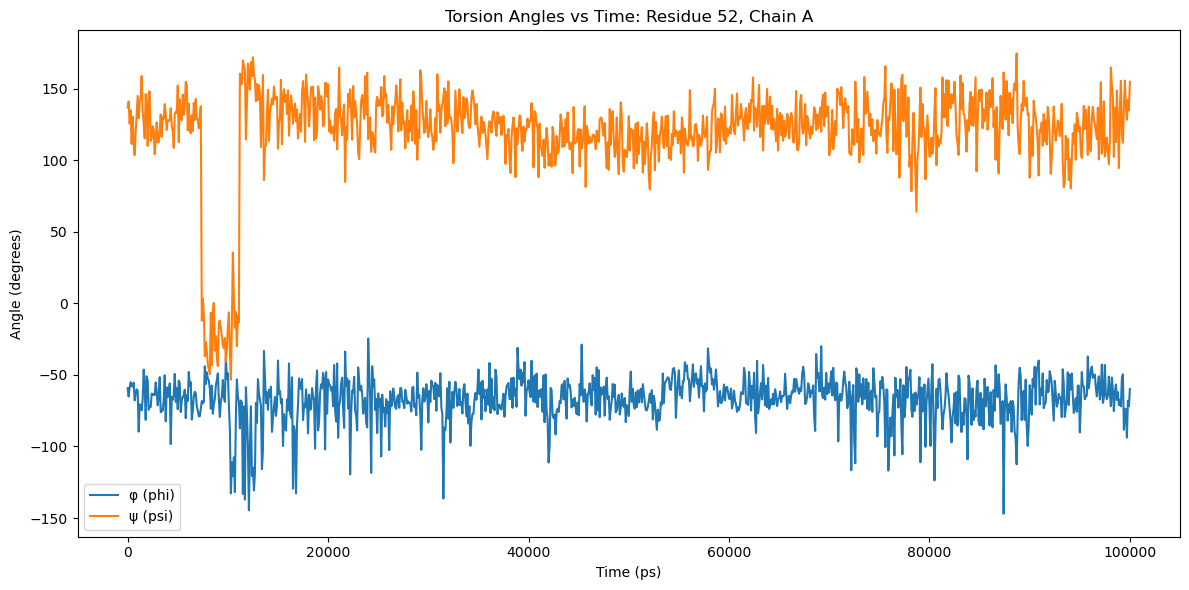

Plot saved as KcsA_inter_torsion_vs_time_ChainA/Inter_Torsion_vs_Time_Residue_52_Chain_A.png


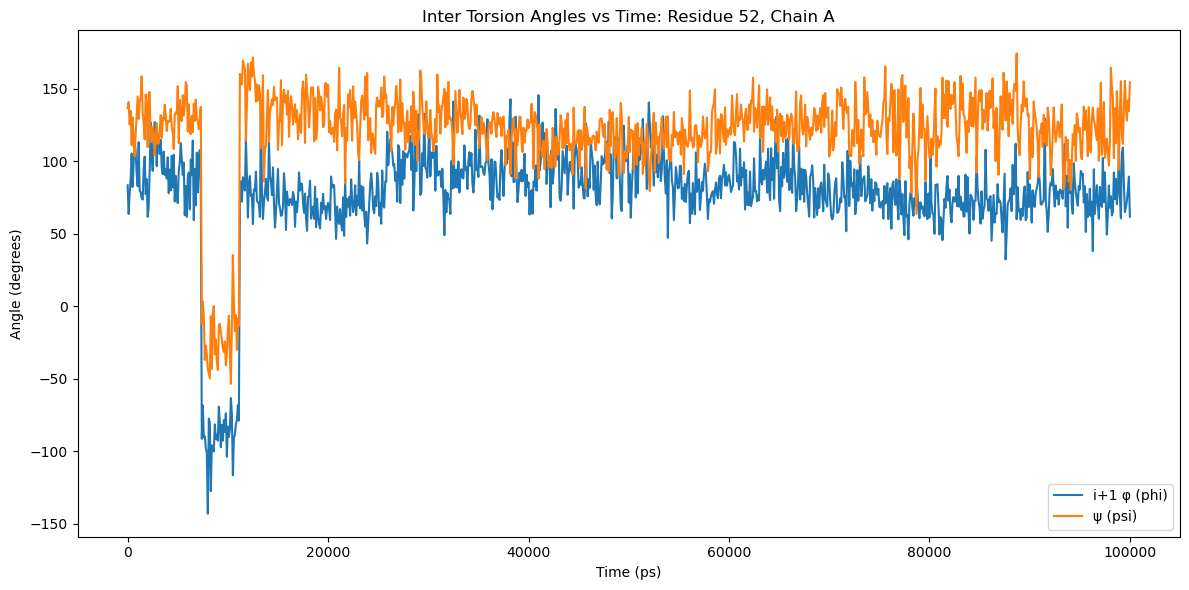

In [14]:
from torsion_analysis_module2 import *
# import plot functions to plot torsion angles(intra and inter) vs time 

# plot the torsion angles over time
residues_to_plot=[52]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='A', analyzer=KcsA_analyzer[0], output_dir='KcsA_torsion_vs_time_ChainA')
    plot_inter_torsion_vs_time(residue=residue, chain='A', analyzer=KcsA_analyzer[0], output_dir='KcsA_inter_torsion_vs_time_ChainA')

Plot saved as KcsA_torsion_vs_time_ChainB/Torsion_vs_Time_Residue_52_Chain_B.png


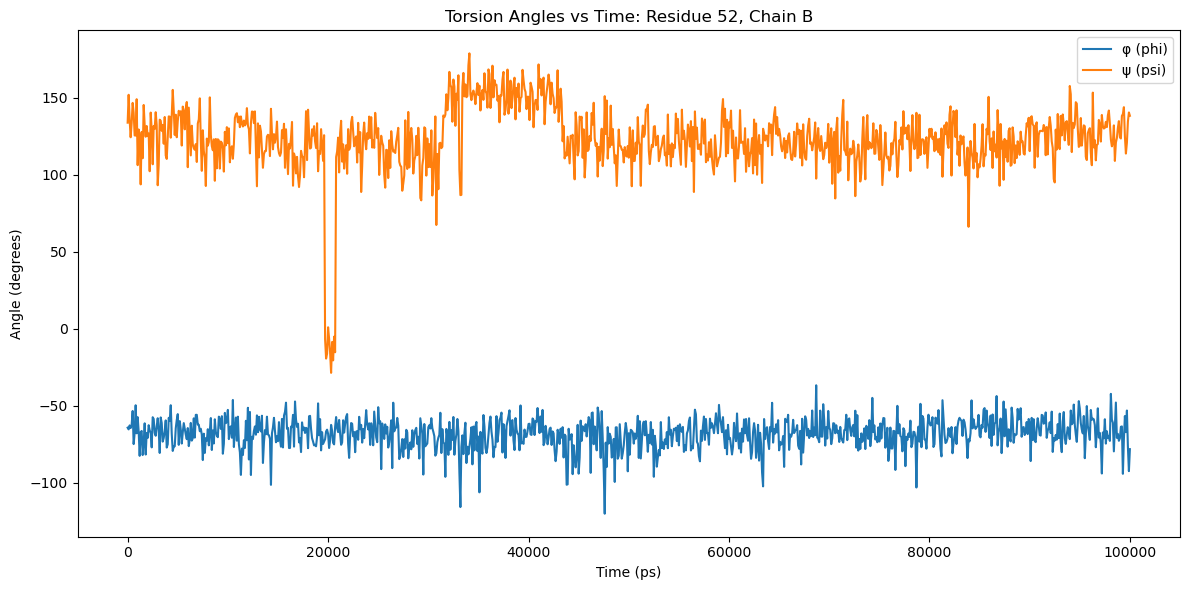

Plot saved as KcsA_inter_torsion_vs_time_ChainB/Inter_Torsion_vs_Time_Residue_52_Chain_B.png


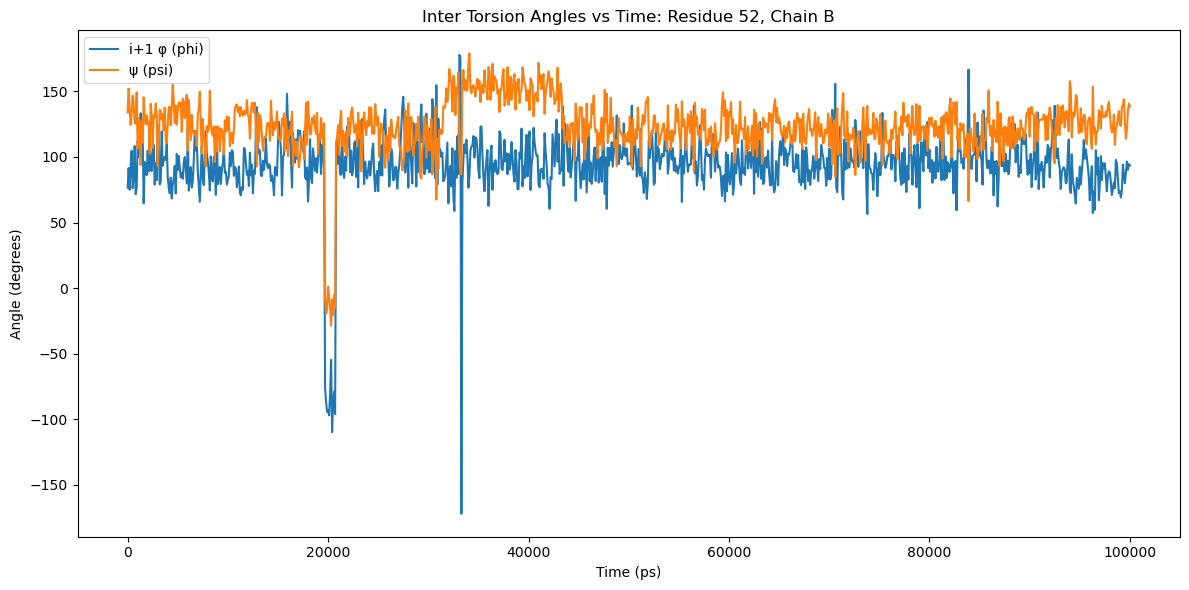

Plot saved as KcsA_torsion_vs_time_ChainB/Torsion_vs_Time_Residue_79_Chain_B.png


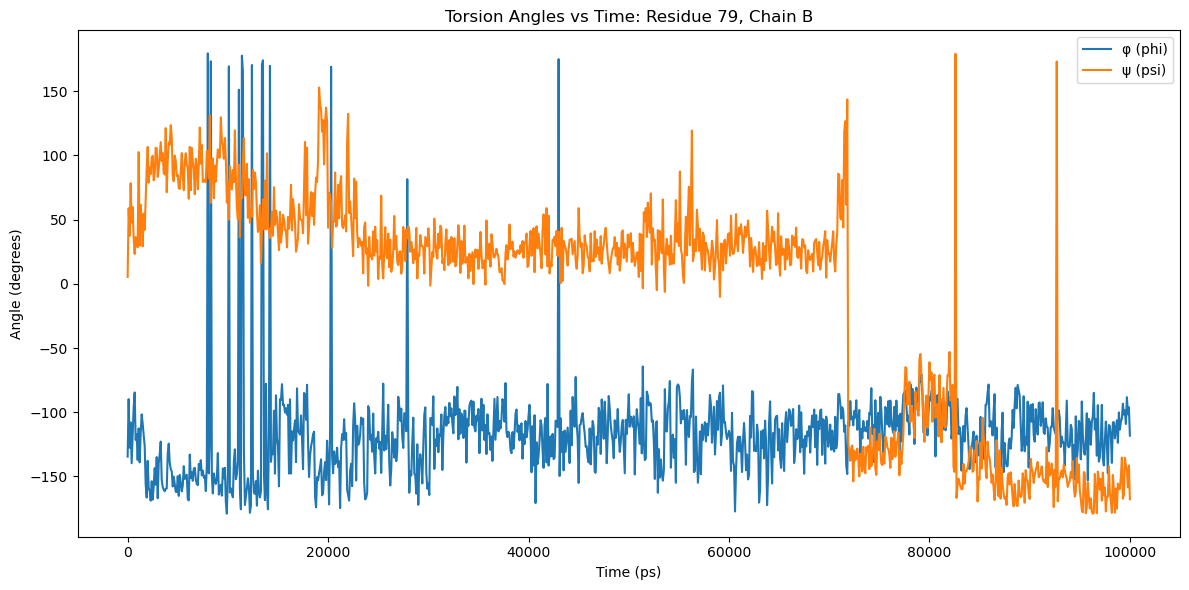

Plot saved as KcsA_inter_torsion_vs_time_ChainB/Inter_Torsion_vs_Time_Residue_79_Chain_B.png


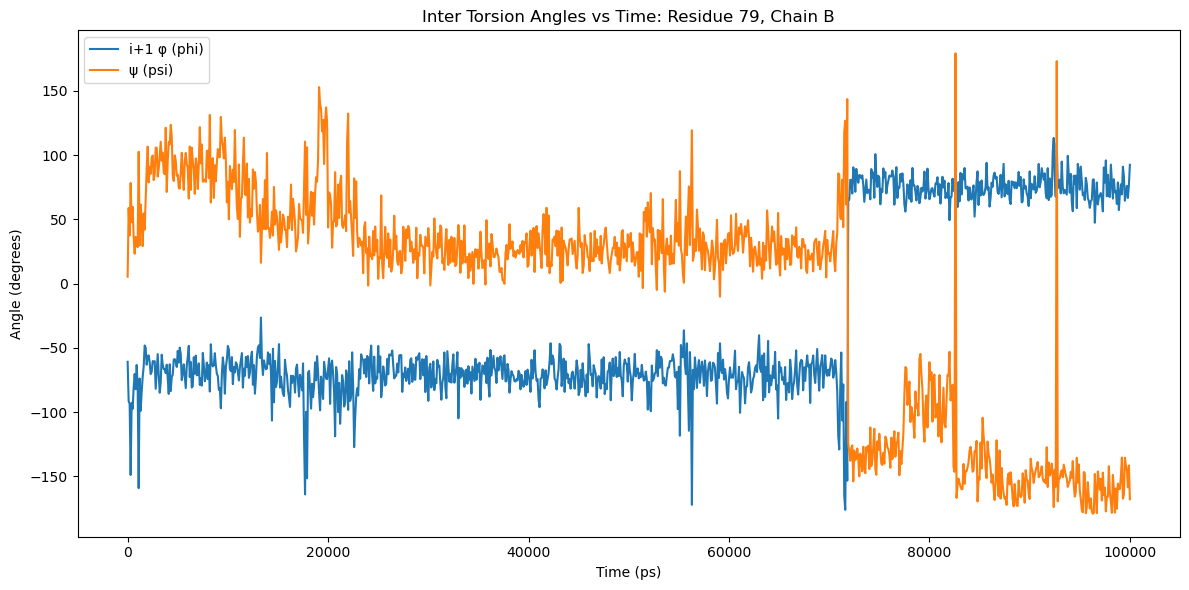

Plot saved as KcsA_torsion_vs_time_ChainB/Torsion_vs_Time_Residue_80_Chain_B.png


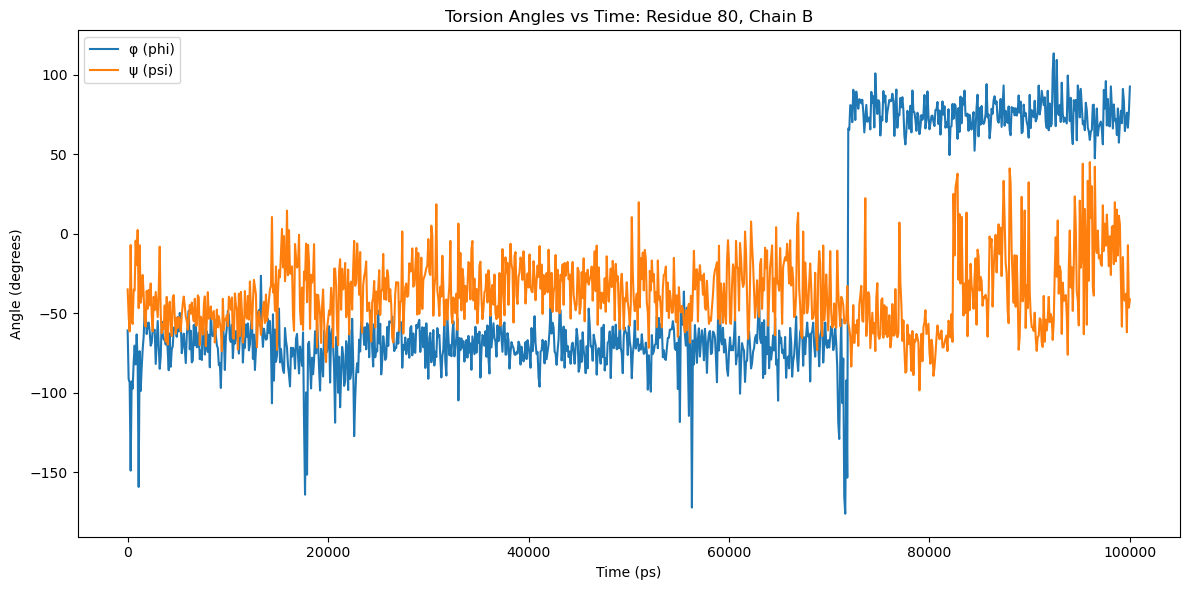

Plot saved as KcsA_inter_torsion_vs_time_ChainB/Inter_Torsion_vs_Time_Residue_80_Chain_B.png


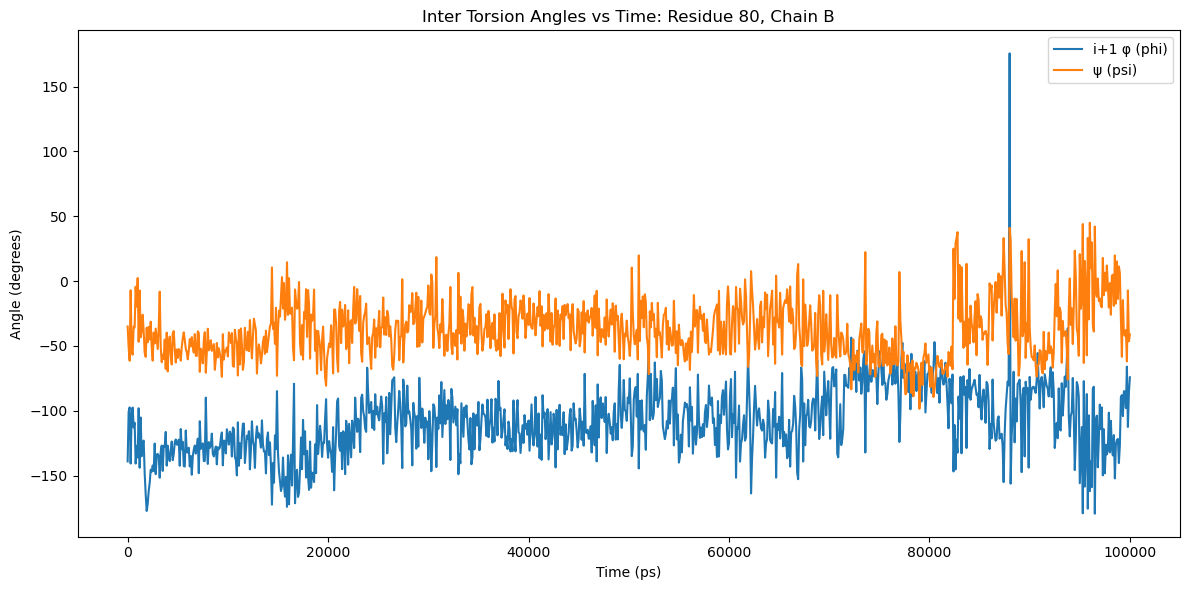

In [15]:
residues_to_plot=[52, 79, 80]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='B', analyzer=KcsA_analyzer[1], output_dir='KcsA_torsion_vs_time_ChainB')
    plot_inter_torsion_vs_time(residue=residue, chain='B', analyzer=KcsA_analyzer[1], output_dir='KcsA_inter_torsion_vs_time_ChainB')

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_52_Chain_C.png


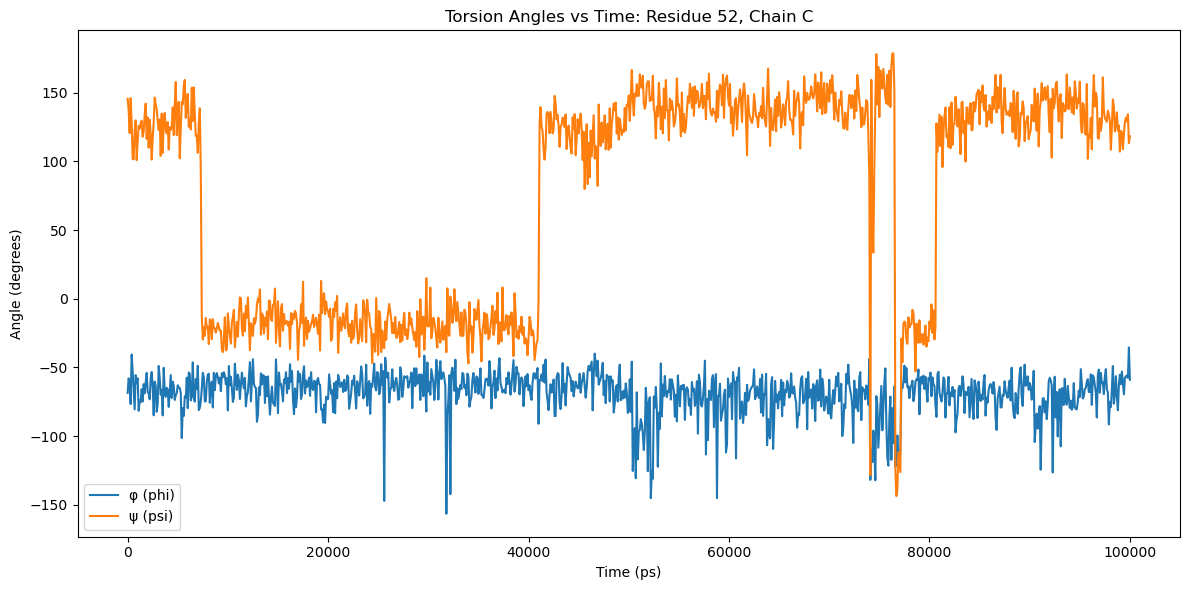

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_52_Chain_C.png


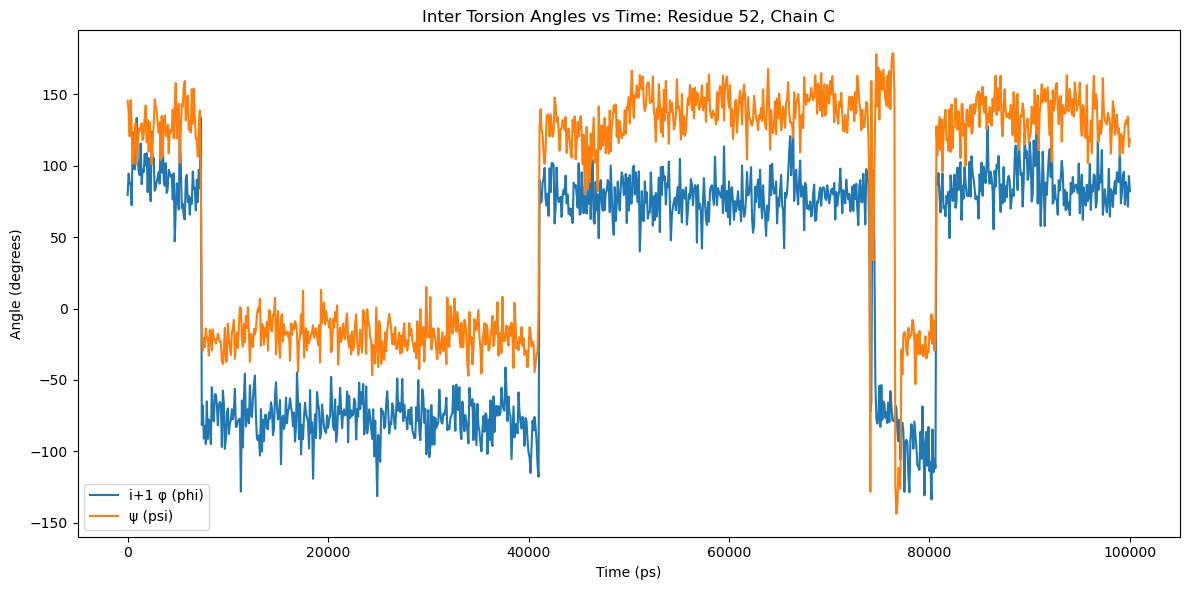

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_77_Chain_C.png


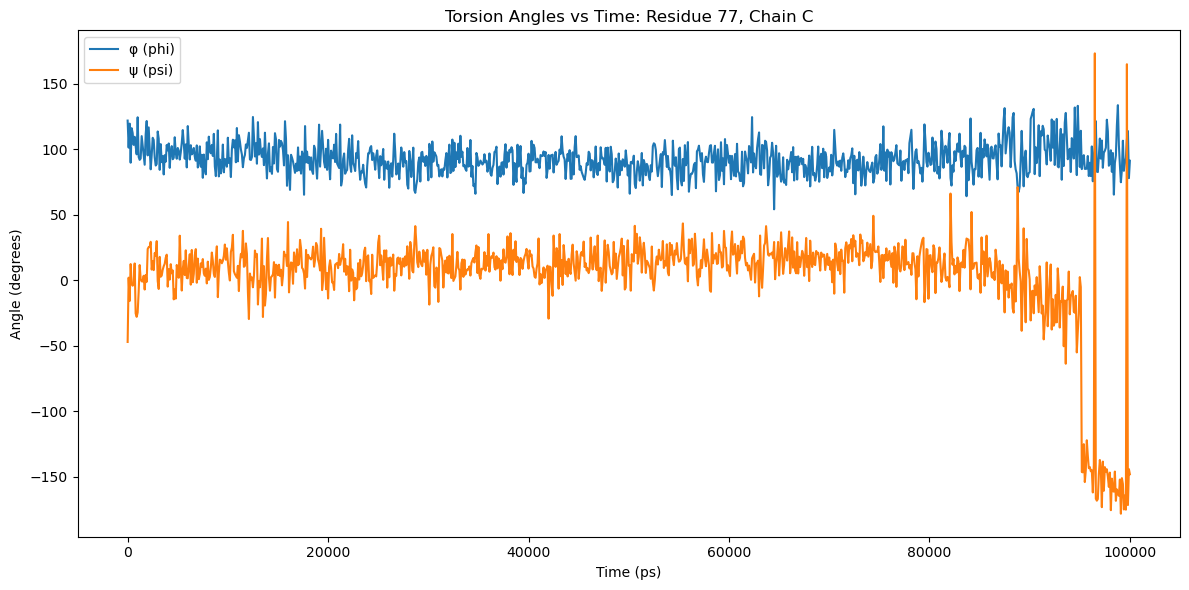

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_77_Chain_C.png


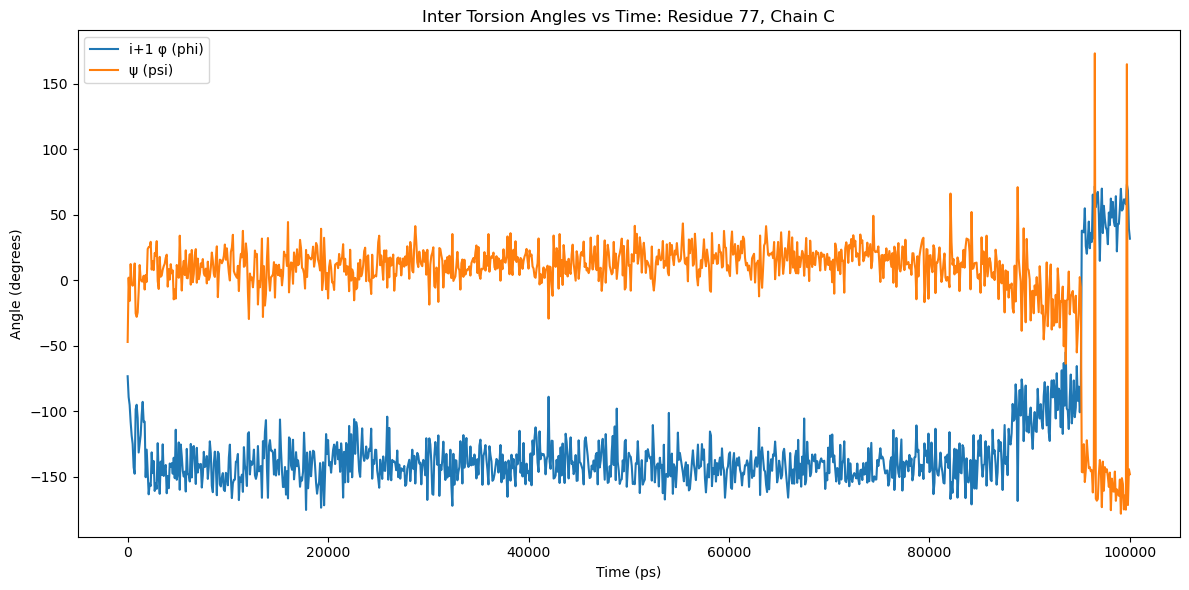

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_78_Chain_C.png


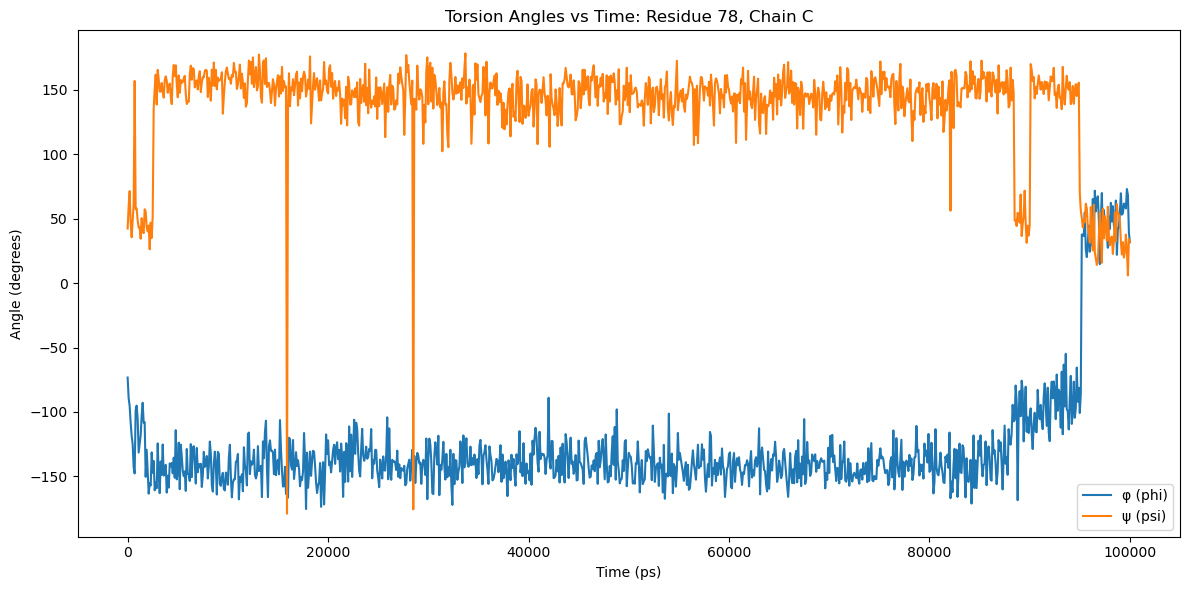

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_78_Chain_C.png


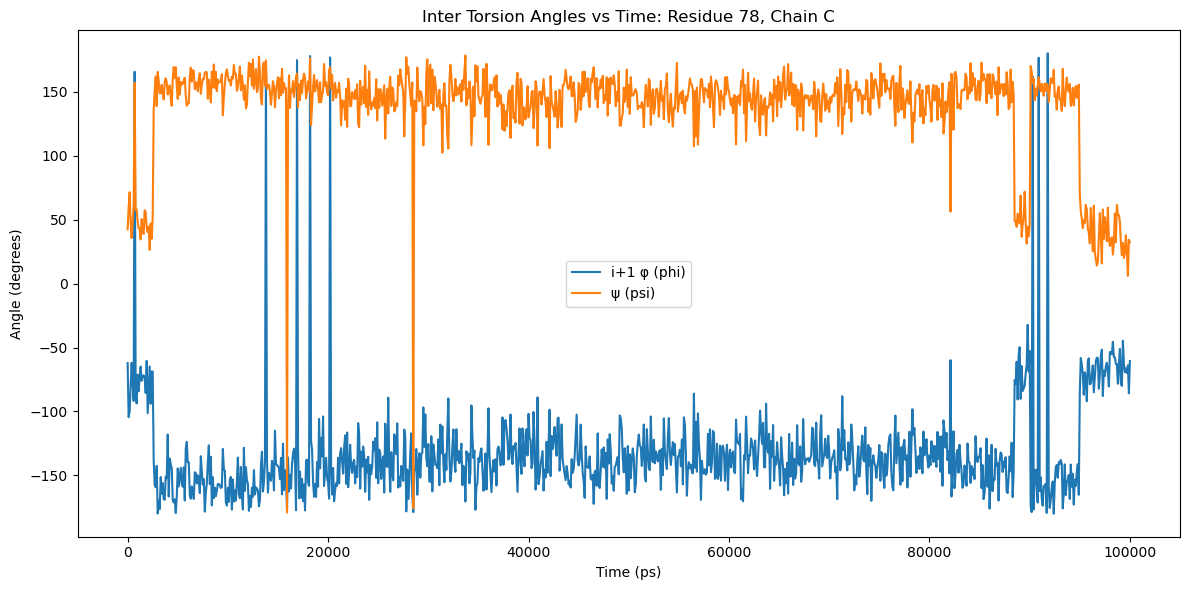

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_79_Chain_C.png


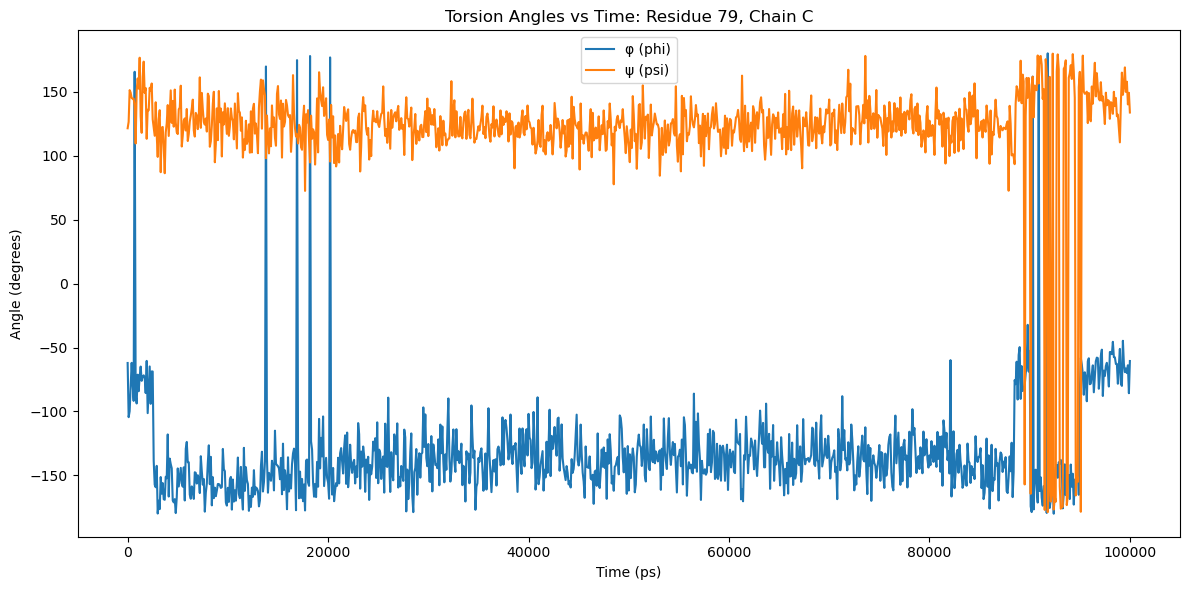

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_79_Chain_C.png


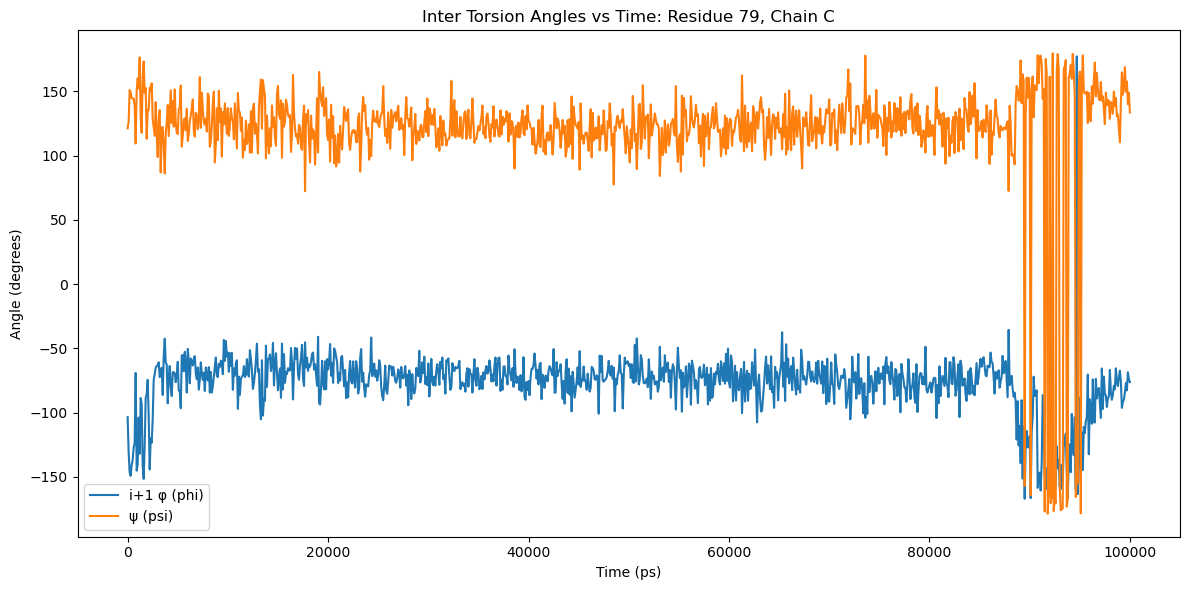

Plot saved as KcsA_torsion_vs_time_ChainC/Torsion_vs_Time_Residue_80_Chain_C.png


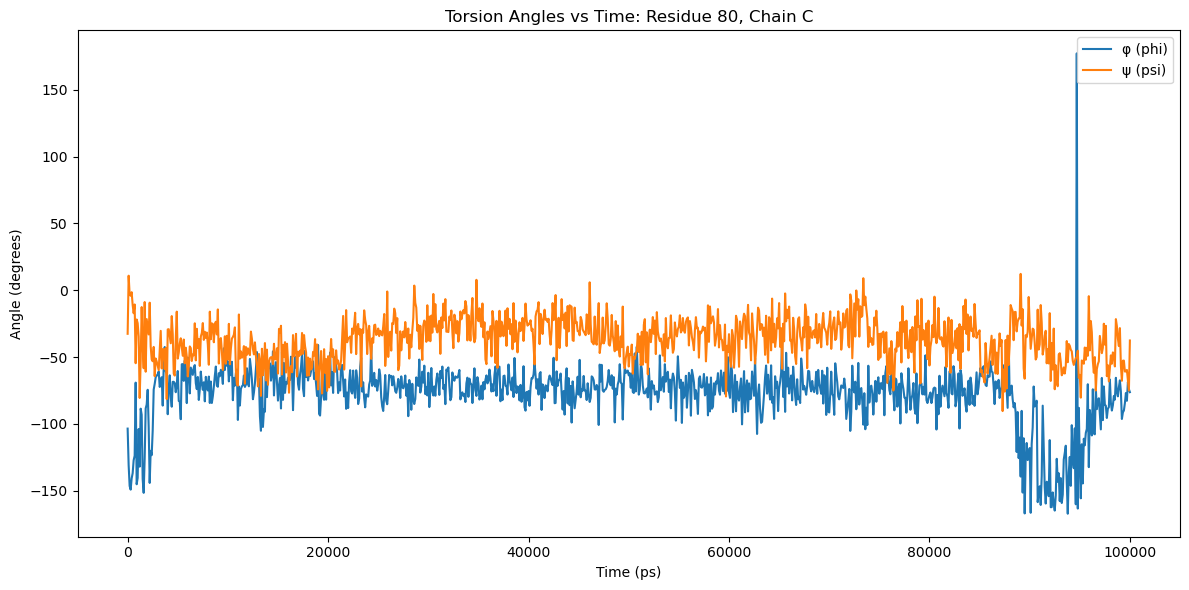

Plot saved as KcsA_inter_torsion_vs_time_ChainC/Inter_Torsion_vs_Time_Residue_80_Chain_C.png


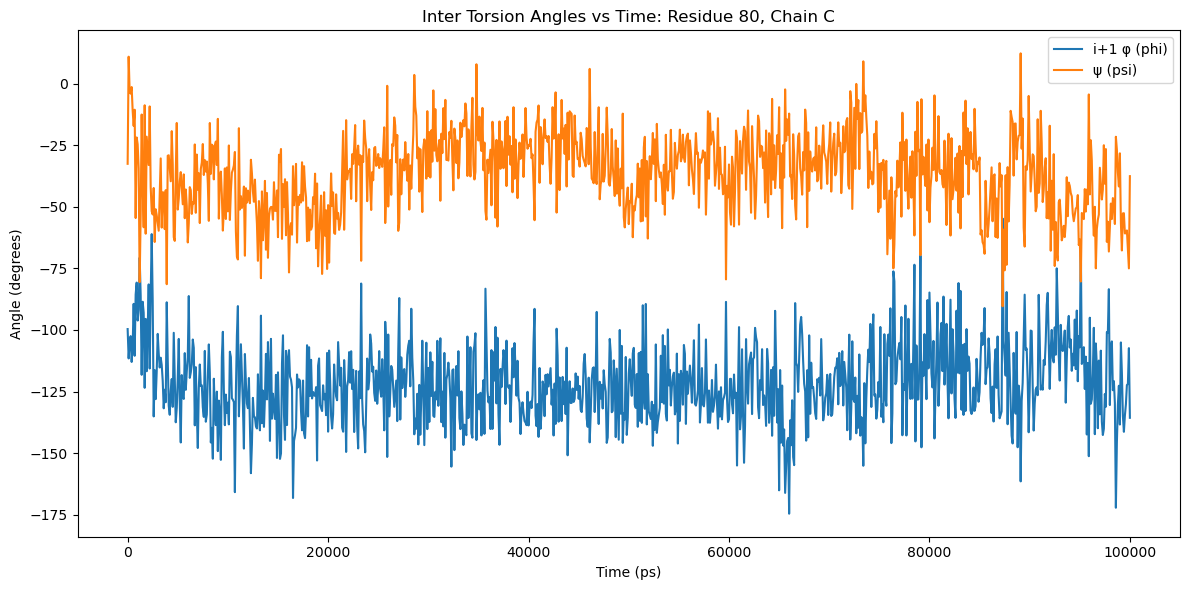

In [19]:
residues_to_plot=[52, 77, 78, 79, 80]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='C', analyzer=KcsA_analyzer[2], output_dir='KcsA_torsion_vs_time_ChainC')
    plot_inter_torsion_vs_time(residue=residue, chain='C', analyzer=KcsA_analyzer[2], output_dir='KcsA_inter_torsion_vs_time_ChainC')

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_77_Chain_D.png


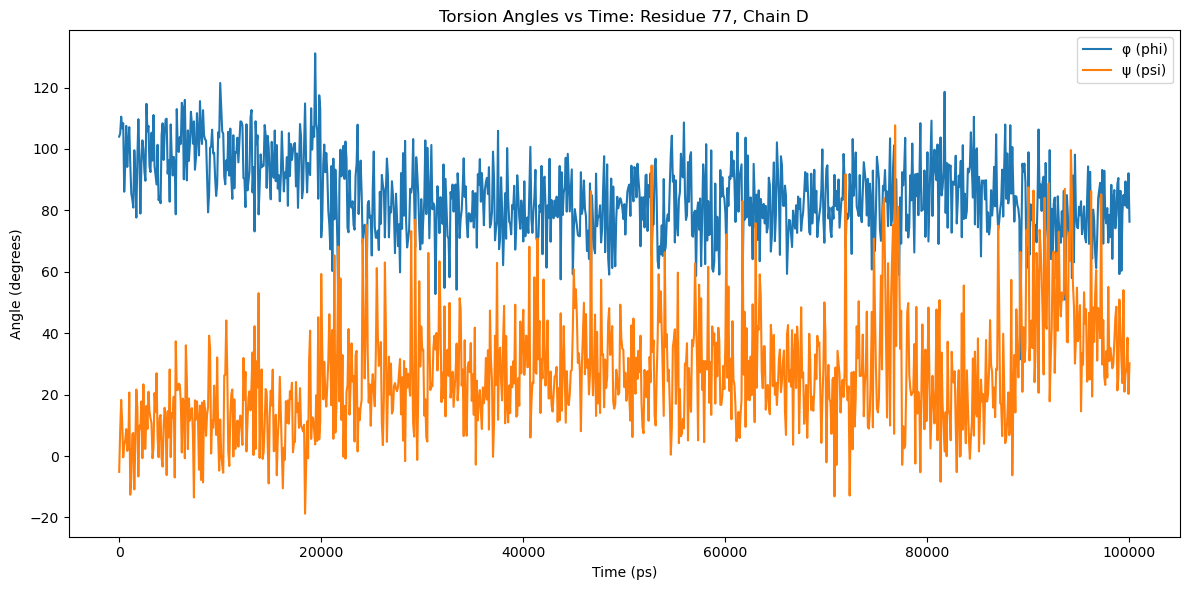

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_77_Chain_D.png


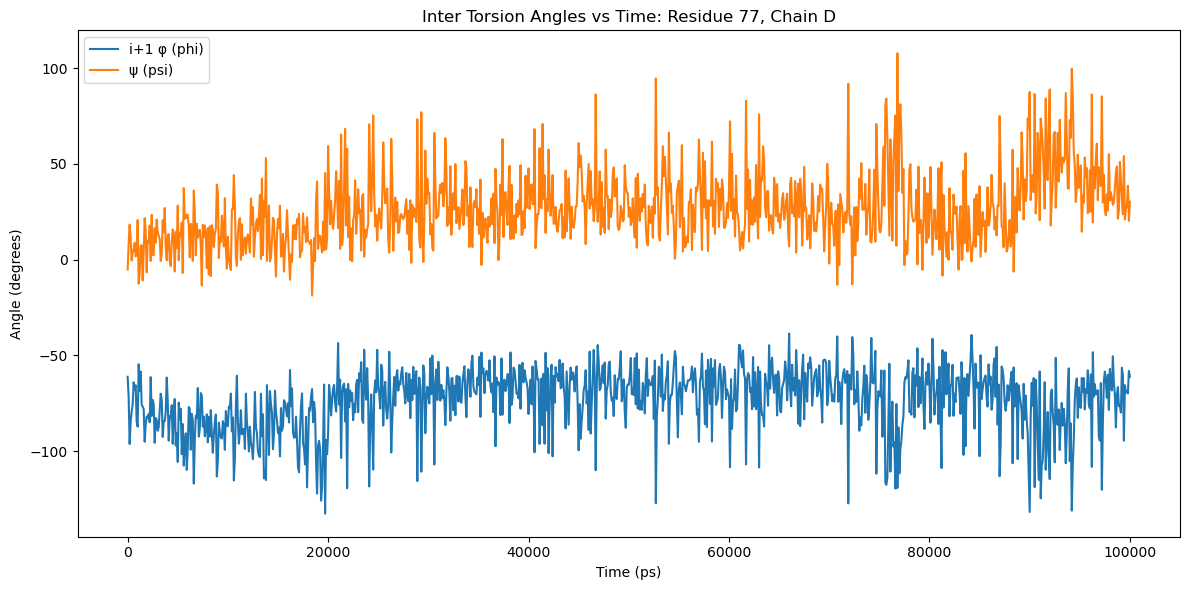

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_78_Chain_D.png


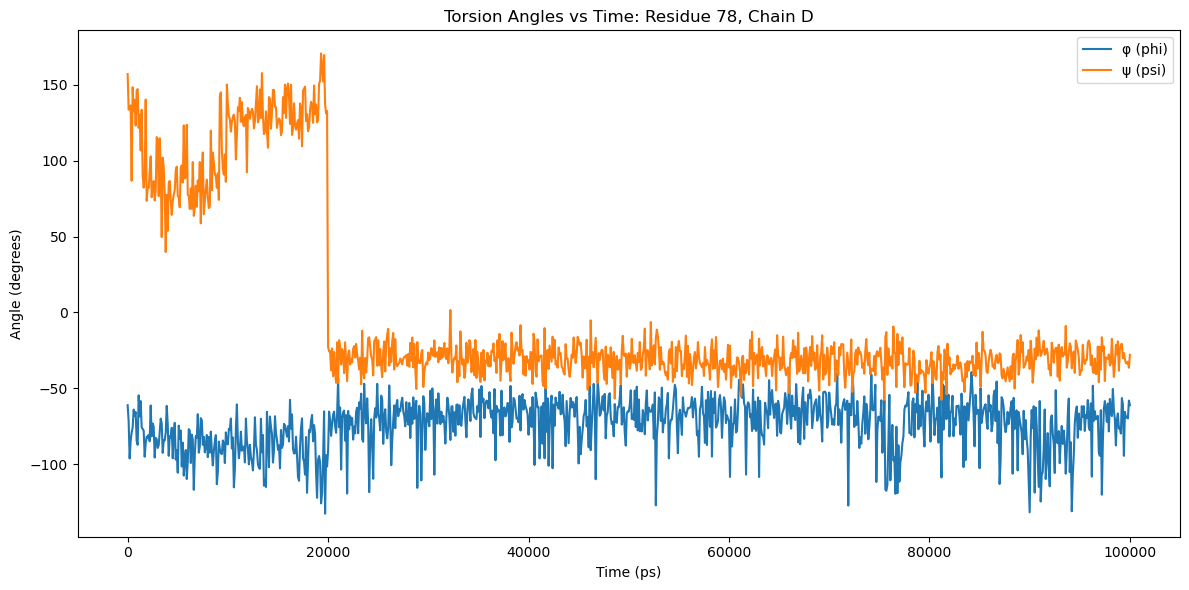

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_78_Chain_D.png


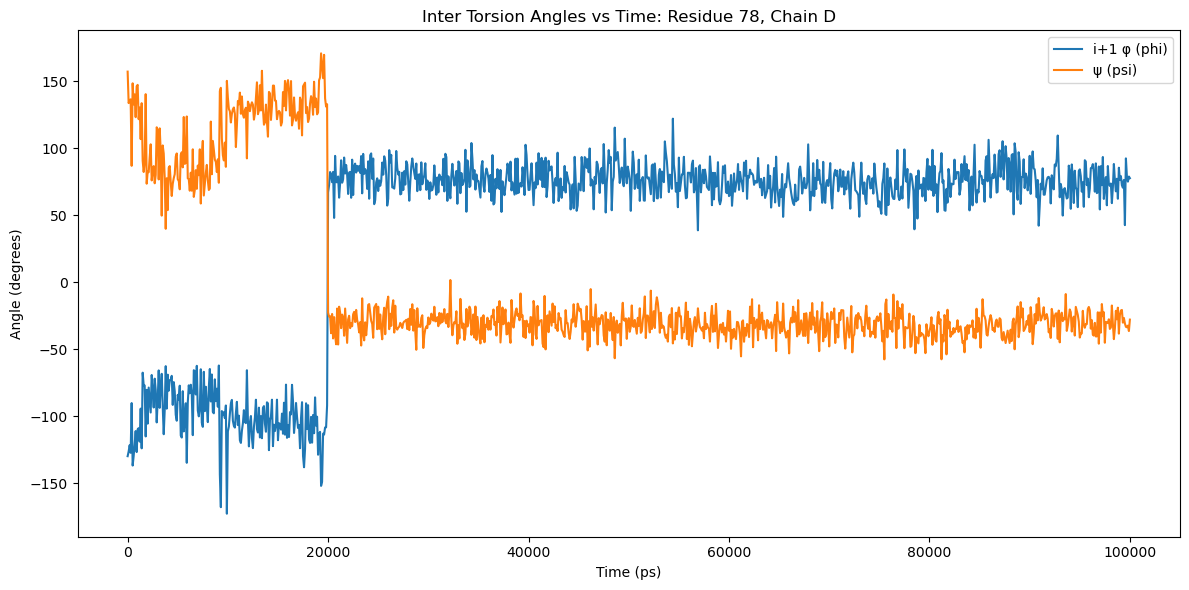

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_79_Chain_D.png


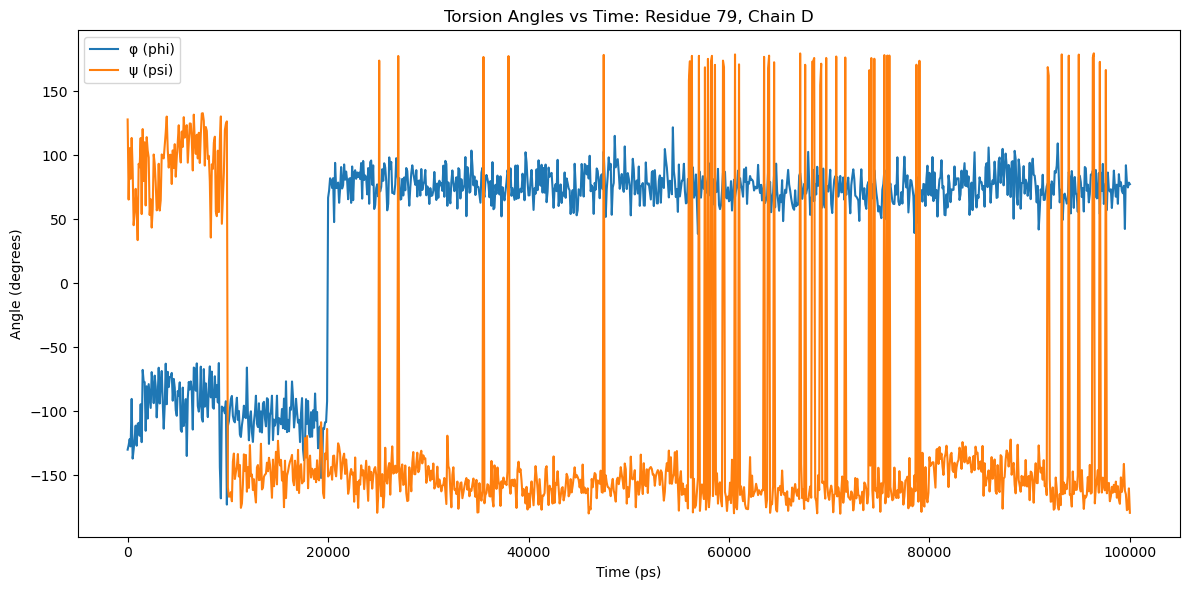

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_79_Chain_D.png


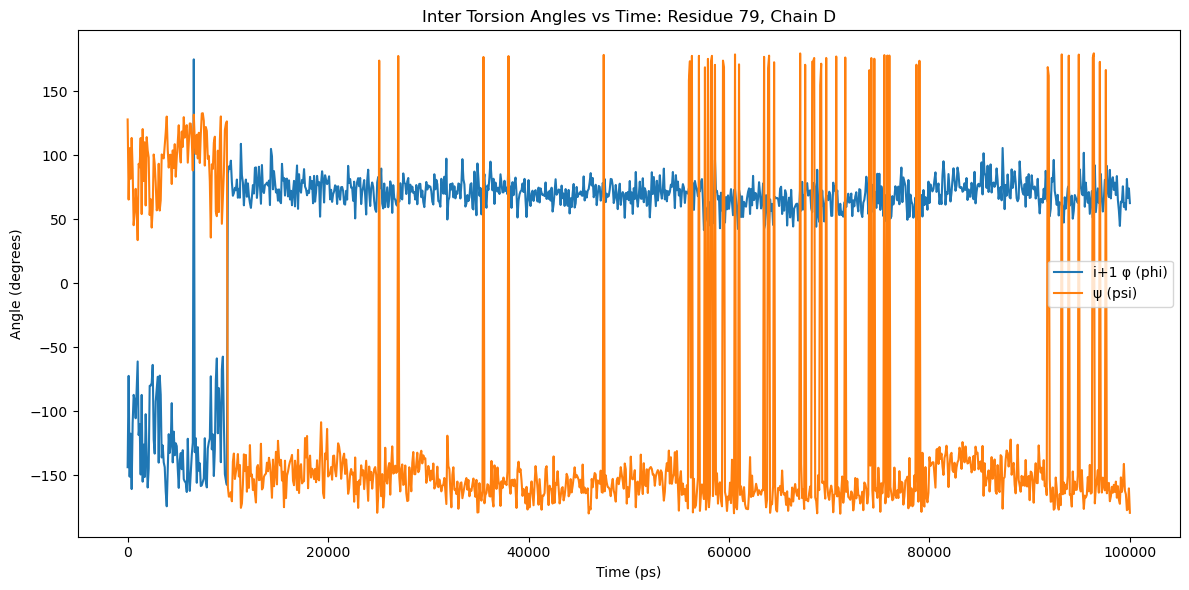

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_80_Chain_D.png


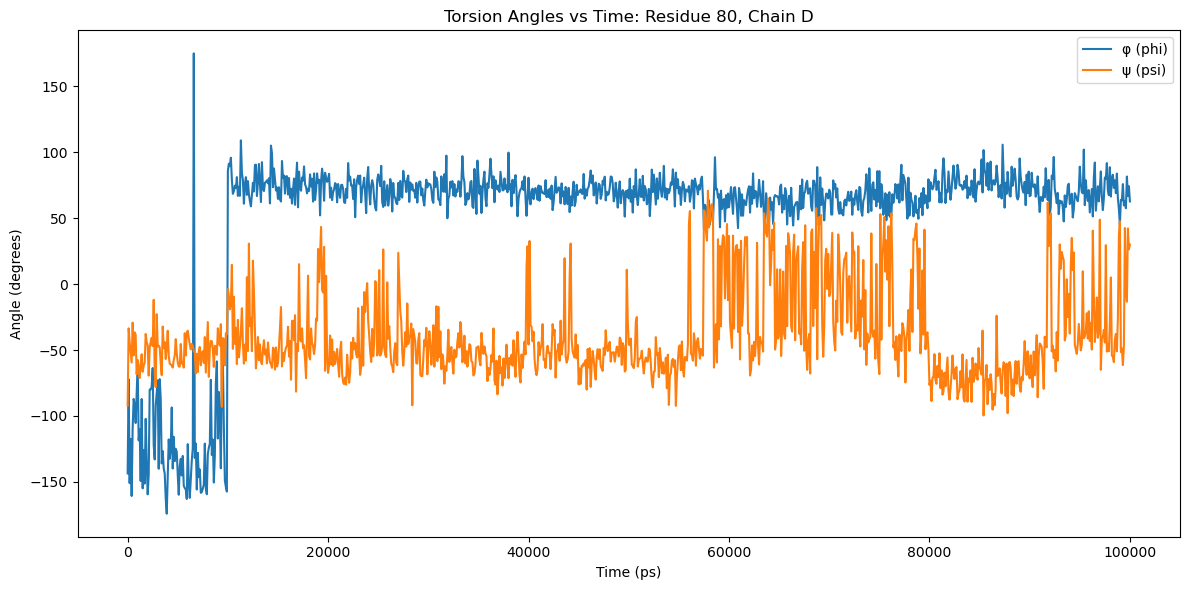

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_80_Chain_D.png


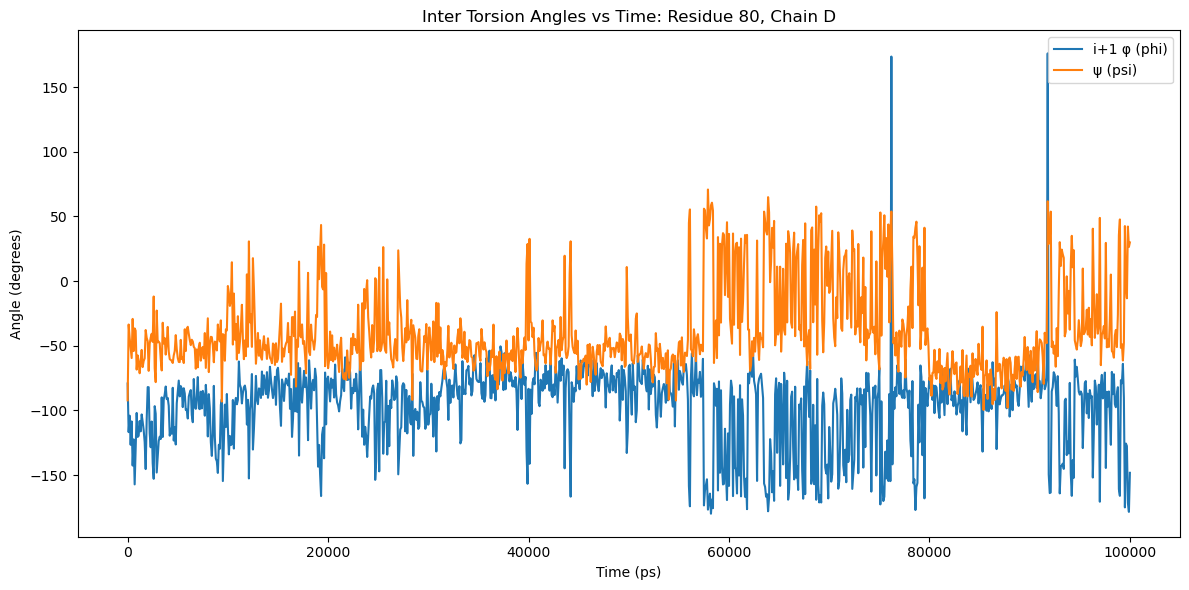

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_81_Chain_D.png


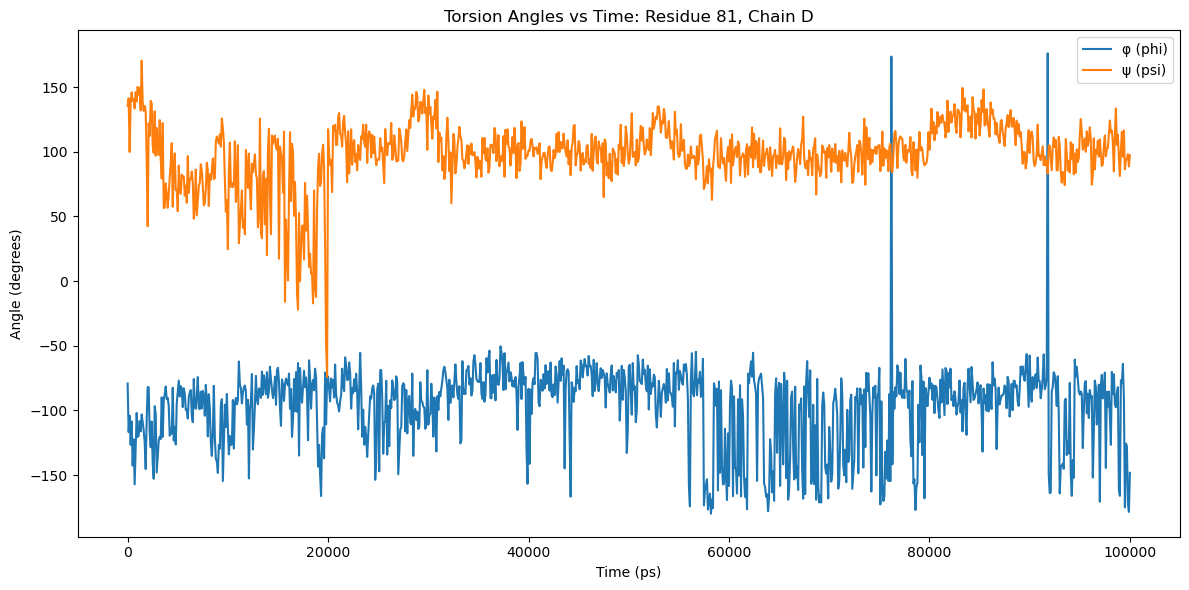

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_81_Chain_D.png


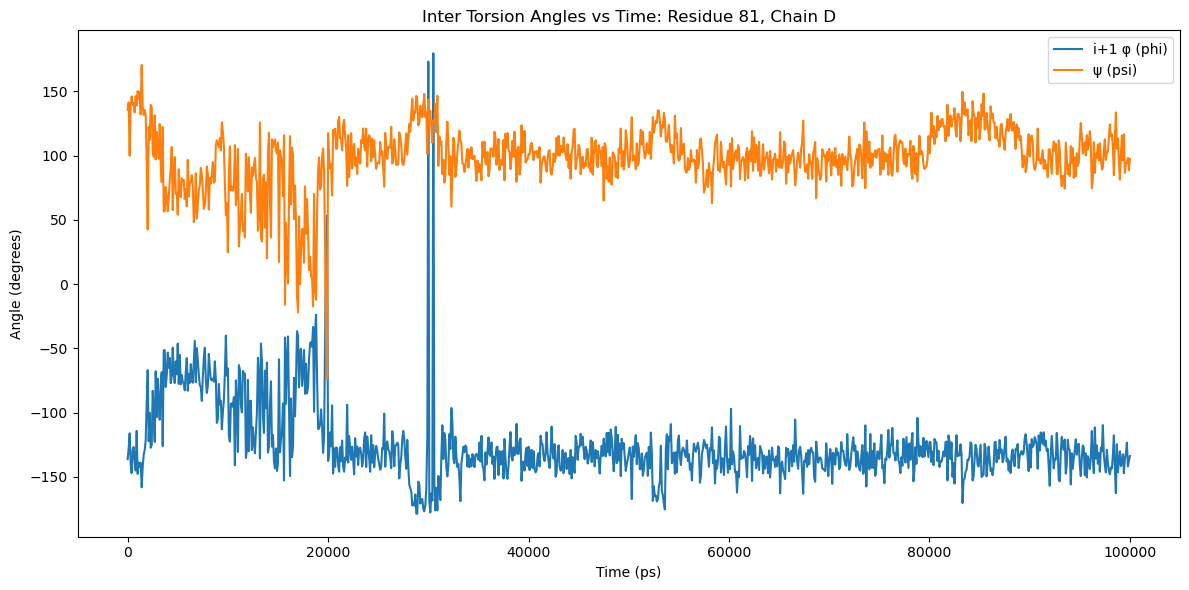

Plot saved as KcsA_torsion_vs_time_ChainD/Torsion_vs_Time_Residue_82_Chain_D.png


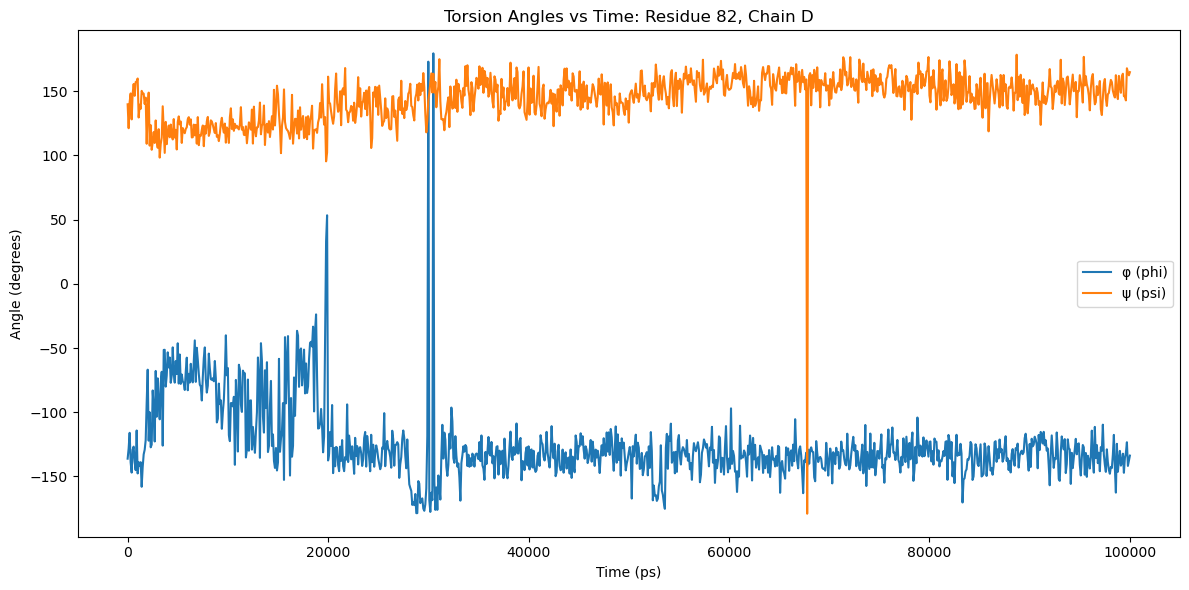

Plot saved as KcsA_inter_torsion_vs_time_ChainD/Inter_Torsion_vs_Time_Residue_82_Chain_D.png


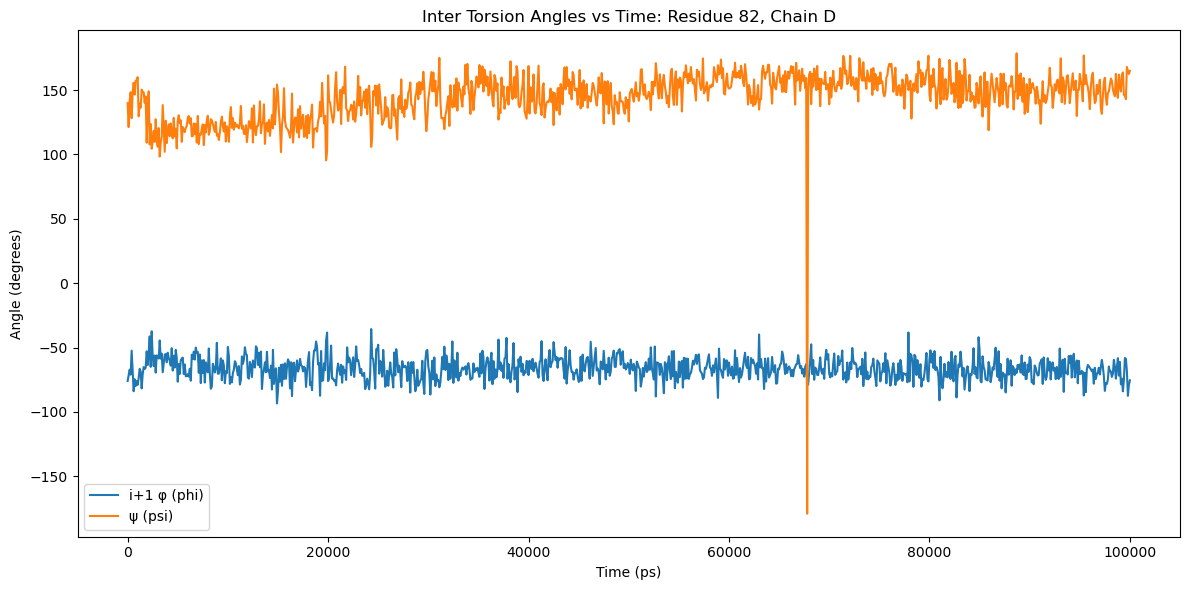

In [18]:
residues_to_plot=[77, 78, 79, 80,81, 82]
#residues_to_plot=[23, 42, 55,61, 65, 97, 131, 146]
for residue in residues_to_plot:
    plot_torsion_vs_time(residue=residue, chain='D', analyzer=KcsA_analyzer[3], output_dir='KcsA_torsion_vs_time_ChainD')
    plot_inter_torsion_vs_time(residue=residue, chain='D', analyzer=KcsA_analyzer[3], output_dir='KcsA_inter_torsion_vs_time_ChainD')